# Homework 4: Natural Language Processing

**Overview**: In this homework you will be working with the Amazon Reviews Dataset. This dataset contains hundreds of thousands of reviews, each with it's raw text, it's summary and a score from 1-5 on the rating corresponding to the review. In this assignment you will be creating a multitude of discriminative models to classify the rating from the text of the review, from simple non-deep learning baseline approaches to creating multiple different deep recurrent neural networks, using attention and transfer learning to boost classfication accuracy. Past that, you will create a generative model to generate summaries of a given review from scratch!


**Collaboration Policy:** This homework assignment is meant to be done in **groups of 2**. You may work on this individually, but be warned that this homework assignment is long and will be difficult to do alone. We highly recommend you form groups. Since this is a group assignment, please read over the collaboration policy again, posted [here](https://www.seas.upenn.edu/~cis522/syllabus.html).



# Q0. Setting up (0 pts)

## Connect to Google Drive

Run the code snippet below to connect to Google Drive.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Utility Functions

The function below is a utility function for plotting Confusion Matrices. We highly recommend that you use it for your analysis, but if you have an easier way of plotting confusion matrices / would like to do it yourself, feel free to do so instead.

In [0]:
from textwrap import wrap
import re
import itertools
import matplotlib
import numpy as np
from sklearn.metrics import confusion_matrix


# Credits - https://stackoverflow.com/questions/41617463/tensorflow-confusion-matrix-in-tensorboard
def plot_confusion_matrix(correct_labels, predict_labels, labels, display_labels, title='Confusion matrix', tensor_name = 'MyFigure/image', normalize=False):
  ''' 
  Parameters:
      correct_labels                  : These are your true classification categories.
      predict_labels                  : These are you predicted classification categories
      labels                          : This is a lit of labels which will be used to display the axix labels
      title='Confusion matrix'        : Title for your matrix
      tensor_name = 'MyFigure/image'  : Name for the output summay tensor

  Returns:
      summary: TensorFlow summary 

  Other itema to note:
      - Depending on the number of category and the data , you may have to modify the figzie, font sizes etc. 
      - Currently, some of the ticks dont line up due to rotations.
  '''
  cm = confusion_matrix(correct_labels, predict_labels, labels=labels)
  if normalize:
      cm = cm.astype('float')*10 / cm.sum(axis=1)[:, np.newaxis]
      cm = np.nan_to_num(cm, copy=True)
      cm = cm.astype('int')

  np.set_printoptions(precision=2)
  ###fig, ax = matplotlib.figure.Figure()

  fig = matplotlib.pyplot.figure(figsize=(2, 2), dpi=320, facecolor='w', edgecolor='k')
  ax = fig.add_subplot(1, 1, 1)
  im = ax.imshow(cm, cmap='Oranges')

  classes = [re.sub(r'([a-z](?=[A-Z])|[A-Z](?=[A-Z][a-z]))', r'\1 ', x) for x in display_labels]
  classes = ['\n'.join(wrap(l, 40)) for l in classes]

  tick_marks = np.arange(len(classes))

  ax.set_xlabel('Predicted', fontsize=7)
  ax.set_xticks(tick_marks)
  c = ax.set_xticklabels(classes, fontsize=4, rotation=-90,  ha='center')
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  ax.set_ylabel('True Label', fontsize=7)
  ax.set_yticks(tick_marks)
  ax.set_yticklabels(classes, fontsize=4, va ='center')
  ax.yaxis.set_label_position('left')
  ax.yaxis.tick_left()

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      ax.text(j, i, format(cm[i, j], 'd') if cm[i,j]!=0 else '.', horizontalalignment="center", fontsize=6, verticalalignment='center', color= "black")
  fig.set_tight_layout(True)
  matplotlib.pyplot.show()

  return

### Test Infrastructure

Run the two code snippets below to instantiate our infrastructure for this assignment.

In [0]:
import os
import dill
import pandas as pd

test_csv_path = "/content/Homework4_Resources/test_release.csv"
repo_path = "/content/Homework4_Resources/test_release.csv"

if not os.path.isdir(repo_path):
  !git clone https://github.com/CIS522/Homework4_Resources.git

test_csv = pd.read_csv(test_csv_path)

def generate_test_predictions(generate_predictions_func):
  return generate_predictions_func(test_csv)

Cloning into 'Homework4_Resources'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 15 (delta 1), reused 5 (delta 1), pack-reused 9
Unpacking objects: 100% (15/15), done.


In [0]:
test_case_1b        = None
test_case_1c        = None
test_case_3e_rnn    = None
test_case_3e_lstm   = None
test_case_3e_gru    = None
test_case_3e_bilstm = None
test_case_4e        = None
test_case_5b        = None

# Data Loading and Pre-processing

In this assignment, you'll be working with the Amazon Reviews Dataset. We've provided you with the train / validate splits. In the code cell below, load in the splits using Pandas.

## Load Splits

In [0]:
# TODO: INSERT CODE HERE
import pandas as pd

train_set = pd.read_csv("/content/drive/My Drive/CIS 522/hw4/dataset/train.csv")
val_set = pd.read_csv("/content/drive/My Drive/CIS 522/hw4/dataset/val.csv")

train_df = pd.DataFrame(train_set)
val_df = pd.DataFrame(val_set)

In [0]:
train_df.info()
train_df['Text'][0]
val_df['Score']
train_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363810 entries, 0 to 363809
Data columns (total 11 columns):
Unnamed: 0                363810 non-null int64
Id                        363810 non-null int64
ProductId                 363810 non-null object
UserId                    363810 non-null object
ProfileName               363799 non-null object
HelpfulnessNumerator      363810 non-null int64
HelpfulnessDenominator    363810 non-null int64
Score                     363810 non-null int64
Time                      363810 non-null int64
Summary                   363792 non-null object
Text                      363810 non-null object
dtypes: int64(6), object(5)
memory usage: 30.5+ MB


Index(['Unnamed: 0', 'Id', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text'],
      dtype='object')

# Q1. Baseline (15 pts)

For any deep learning task, it's good to have a baseline approach to compare against so you can determine if your deep learning approach is truly doing anything extraordinary, or in some cases, is even worse than simpler approaches. In this question we will have you implement a very simple baseline approach for classifying Amazon Reviews.

**Baselines** You will be implementing two simple baseline approaches:

*Approach 1:* For each sentence, process each word individually and note whether it is positive or negative. You will calculate the ratio of positive words to positive + negative words in the sentence, and threshold it to get a prediction between 1-5 of the review's star rating. 

*Approach 2:* In this approach you will feed in the number of positive and negative words in each sentence into a logistic regression classifier to get a classification between 1-5.



## Q1a Processing the Data

Before implementing the baselines, you must first process the data! Look through the Amazon Reviews dataset and consider the headers. For this question, all you will need are the "Text" and "Score" fields. 

Before we process the data, we must note two things:

**How do we get the connotation?** To determine if a word has a "positive" or a "negative" connotation we will be using the [MPQA subjectivity lexicon](https://mpqa.cs.pitt.edu/lexicons/subj_lexicon/) (which we've provided to you as a .tff file in this assignment). If you open the .tff file in a text editor, you'll see that each line has the word, preceded by "word1=" and a polarity of the form "priorpolarity=negative" for a negatively connoted word for instance. You should parse the tff file to create a dictionary that goes from word to it's polarity (positive or negative)

**How do we handle different forms of words?** In this tff file, we note that there's a lot of words, but how do we account for different forms of words? For instance, how do we account for the plural form of a noun, or a different conjugation of a verb? In NLP it is very common to account for this by "lemmatizing" a word, which essentially means to convert words to a "base" form so they can be analyzed more easily. In this classification task, this is useful since we don't care about how a word is conjugated, just what the connotation of a word is.

**Q1a (1 pts):** In this question, create a dictionary from the .tff file such that the keys are the lemmatized forms of the word, and the value is the polarity of the word (if the word is positive, let its value be 1, if it's negative let it be 0). We've initialized NLTK and specifically the lemmatizer for you below. Do ```lemmatizer.lemmatize(word)``` to lemmatize a specific word. In your writeup, give three examples of words which are different than their lemmatized forms (i.e. are not the exact same text).



In [0]:
import nltk
from nltk.stem import WordNetLemmatizer 
import numpy as np
nltk.download('wordnet')
nltk.download('punkt') # Download this as this allows you to tokenize words in a string.
lemmatizer = WordNetLemmatizer()
dict_words = {}
diff_idx = []
keys = []

# load tff
for idx, line in enumerate(open('/content/drive/My Drive/cis522/HW4/MPQA_Subjectivity_Lexicon.tff')): 
    findword = line.find("word1=")
    findspace1 = line.find(" pos1")
    key = lemmatizer.lemmatize(line[findword+6:findspace1])
    if key != line[findword+6:findspace1]:
        print("init:", line[findword+6:findspace1], "lemmatized:", key)

    findpolarity = line.find("priorpolarity=")
    polarity = line[findpolarity+len("priorpolarity="):-1]
    if polarity == "positive":
        value = 1
    else:
        value = 0

    dict_words.update({key:value}) 

key_list = list(dict_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
init: abilities lemmatized: ability
init: abuses lemmatized: abuse
init: abuses lemmatized: abuse
init: accolades lemmatized: accolade
init: accomplishments lemmatized: accomplishment
init: accusations lemmatized: accusation
init: accusations lemmatized: accusation
init: achievements lemmatized: achievement
init: adolescents lemmatized: adolescent
init: adolescents lemmatized: adolescent
init: advantages lemmatized: advantage
init: advantages lemmatized: advantage
init: agonies lemmatized: agony
init: airs lemmatized: air
init: airs lemmatized: air
init: alas lemmatized: ala
init: allegations lemmatized: allegation
init: allegations lemmatized: allegation
init: alliances lemmatized: alliance
init: alliances lemmatized: alliance
init: allusions lemmatized: allusion

**Thresholding Baseline**

Now that you've created this dictionary, go through your training dataset and for each review, compute the following ratio: $$ratio = \frac{positive}{positive + negative}$$ Where $positive$ is the number of words with positive polarity in the review, and $negative$ is the number of words with negative polarity in the dataset. 

**Notes:** You can tokenize the text into individual words by using ```nltk.word_tokenize(text)```. Don't forget to lemmatize each word as well! You can treat any word not in the MPQA subjectivity lexicon as having a neutral sentiment. For the case where $positive + negative = 0$ feel free to handle it however you like (i.e. always have it predict a certain class, etc.). Describe how you handled this in your writeup for **Q1d**.

**Q1b (2 pts; 2 pts autograder):** Using the validation set, create a series of thresholds such that you can threshold this ratio to produce your review predictions between 1 and 5. Calculate the F1 score of your predictions versus the ground truth scores (setting average to **macro**). You may use SkLearn to calculate the F1 Score. In your writeup, describe how you chose these thresholds and what the resulting macro average F1 Score is for your training set and validation set.

In [0]:
list(dict_words.values())[0]

0

In [0]:
# TODO: INSERT CODE HERE
ratio_ls = np.array([])
val_x = []

for text in val_df['Text']:
    words = nltk.word_tokenize(text)
    # print(words in key_list)
    inter = list(set(words).intersection(set(key_list)))
    if inter:
        idx = np.array([key_list.index(i) for i in inter])
        value = np.array(list(dict_words.values()))[idx]
        pos_num = np.sum(value)
        neg_num = (value.shape[0])-pos_num
        ratio = pos_num / (pos_num+neg_num)
    else:
        ratio = np.random.rand()
        pos_num = 0
        neg_num = 0
    val_x.append([pos_num, neg_num])
    # val_x = np.append(val_x, np.array([pos_num, neg_num]), axis=1)
    ratio_ls = np.append(ratio_ls, ratio)

# print(val_x)
# print(ratio_ls)

In [0]:
from sklearn.metrics import f1_score
threshold = [0.33, 0.42, 0.54, 0.7]
pre = np.copy(ratio_ls)

# Using threshold to get score
pre[(ratio_ls<=threshold[0])] = 1
pre[np.logical_and(ratio_ls<=threshold[1], ratio_ls>threshold[0])] = 2
pre[np.logical_and(ratio_ls<=threshold[2], ratio_ls>threshold[1])] = 3
pre[np.logical_and(ratio_ls<=threshold[3], ratio_ls>threshold[2])] = 4
pre[(ratio_ls>threshold[3])] = 5
pre_val = pre.astype('int')
# print(pre)

# compute F1 accuracy
val_scoreList = np.array(list(val_df['Score']))
print(np.unique(val_scoreList))
print(np.unique(pre_val))
print('val f1 score', f1_score(pre.astype('int'), val_scoreList, average='macro'))


[1 2 3 4 5]
[1 2 3 4 5]
val f1 score 0.280503150610219


In [0]:
ratio_ls_train = np.array([])
for i in range(len(train_x)):
    if np.sum(train_x[i])>0:
        ratio =  train_x[i][0] / (train_x[i][0]+train_x[i][1]) 
        
    else:
        ratio = np.random.rand()
    ratio_ls_train = np.append(ratio_ls_train, ratio)

In [0]:
from sklearn.metrics import f1_score
threshold = [0.33, 0.42, 0.54, 0.7]
pre = np.copy(ratio_ls_train)

# Using threshold to get score
pre[(ratio_ls_train<=threshold[0])] = 1
pre[np.logical_and(ratio_ls_train<=threshold[1], ratio_ls_train>threshold[0])] = 2
pre[np.logical_and(ratio_ls_train<=threshold[2], ratio_ls_train>threshold[1])] = 3
pre[np.logical_and(ratio_ls_train<=threshold[3], ratio_ls_train>threshold[2])] = 4
pre[(ratio_ls_train>threshold[3])] = 5
pre_train = pre.astype('int')
# print(pre)

# compute F1 accuracy
train_scoreList = np.array(list(train_df['Score']))
print(np.unique(train_scoreList))
print(np.unique(pre_train))
print('train f1 score', f1_score(pre_train, train_scoreList, average='macro'))

[1 2 3 4 5]
[1 2 3 4 5]
train f1 score 0.21560215193837334


**Q1c (3 pts; 3pts autograder):** Now, train a logistic regression classifier, where the inputs to the logistic regression classifier are the number of positively and negatively connoted words in the sentence. Tune the hyperparameters using the validation set. Create a test set from the training set, train the logistic regression using the hyperparameters obtained from tuning on the validation set, and then report your test, training, and validation set macro-averaged F1 Scores in your writeup. Discuss how you tuned hyperparameters in your writeup.

In [0]:
# TODO: INSERT CODE HERE

# ratio_ls = np.array([])
train_x = []

for text in train_df['Text']:
    words = nltk.word_tokenize(text)
    # print(words in key_list)
    inter = list(set(words).intersection(set(key_list)))
    if inter:
        idx = np.array([key_list.index(i) for i in inter])
        value = np.array(list(dict_words.values()))[idx]
        pos_num = np.sum(value)
        neg_num = (value.shape[0])-pos_num
        # ratio = pos_num / (pos_num+neg_num)
    else:
        # ratio = np.random.rand()
        pos_num = 0
        neg_num = 0

    train_x.append([pos_num, neg_num])
    # ratio_ls = np.append(ratio_ls, ratio)

train_x = np.array(train_x)
# print(ratio_ls)

In [0]:
train_x = np.load("/content/drive/My Drive/cis522/HW4/train_x.npy")
val_x = np.load("/content/drive/My Drive/cis522/HW4/val_x.npy")

In [0]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

C_ls = [0.01, 0.1, 1, 2]
weight = {1:6.9601, 2:12.2044,  3:8.4852,  4:4.5143,  5:1.0000}

train_scoreList = np.array(list(train_df['Score']))
X_train, X_test, y_train, y_test = train_test_split(train_x, train_scoreList, test_size=0.2, shuffle=True)

for i in C_ls:
    print(i)
    clf = LogisticRegression(random_state=0, solver='sag', C=i, class_weight=weight).fit(X_train, y_train)
    val_pre = clf.predict(val_x)
    train_pre = clf.predict(X_train)
    test_pre = clf.predict(X_test)

    print('train f1 score:', f1_score(y_train, train_pre, average='macro'))
    print('val f1 score:', f1_score(val_scoreList, val_pre, average='macro'))
    print('test f1 score:', f1_score(y_test, test_pre, average='macro'))
    print('================================================================')

0.01
train f1 score: 0.25677477136792054
val f1 score: 0.2441306568603912
test f1 score: 0.26139379931363405
0.1
train f1 score: 0.25677477136792054
val f1 score: 0.2441306568603912
test f1 score: 0.26139379931363405
1
train f1 score: 0.25677477136792054
val f1 score: 0.2441306568603912
test f1 score: 0.26139379931363405
2
train f1 score: 0.25677477136792054
val f1 score: 0.2441306568603912
test f1 score: 0.26139379931363405


**Q1d (4 pts):** Compare the results from the logistic regression baseline and the thresholding baseline. Plot a confusion matrix for both and compare the results / put the confusion matrices in the writeup (feel free to use the utility function we provided above).

**Submitting your solutions:** As in the previous homeworks, implement the below header that takes in a Pandas dataframe and returns the predictions of review scores for each of the Amazon reviews.

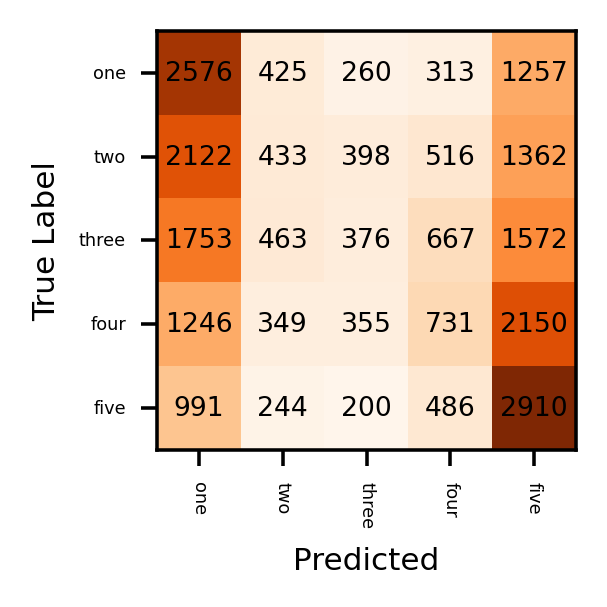

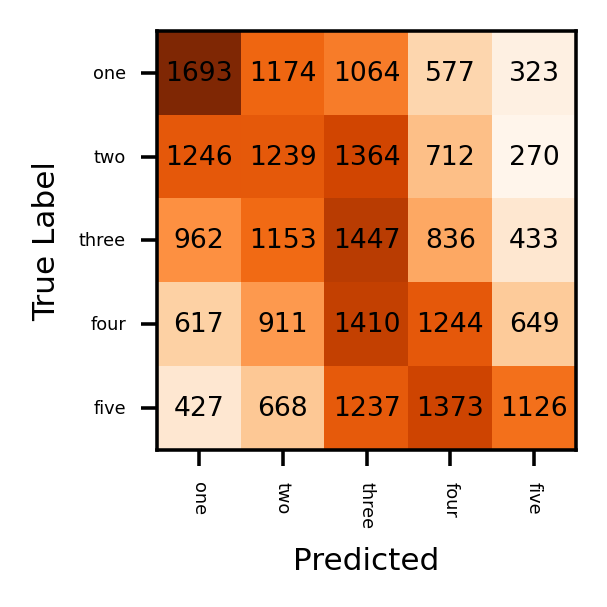

In [0]:
# TODO: INSERT CODE HERE
# f1_score(y_pre, y_test, average='macro')
plot_confusion_matrix(val_scoreList, val_pre, None, ["one","two","three","four","five"], title='Logistic Regression Confusion matrix', tensor_name = 'MyFigure/image', normalize=False)
plot_confusion_matrix(val_scoreList, pre, None, ["one","two","three","four","five"], title='Thresholding Confusion matrix', tensor_name = 'MyFigure/image', normalize=False)

In [0]:
# generate ratio and x for test
test_set = pd.read_csv(repo_path)
test_df = pd.DataFrame(test_set)

ratio_ls_test = np.array([])
test_x = []

for text in test_df['Text']:
    words = nltk.word_tokenize(text)
    # print(words in key_list)
    inter = list(set(words).intersection(set(key_list)))
    if inter:
        idx = np.array([key_list.index(i) for i in inter])
        value = np.array(list(dict_words.values()))[idx]
        pos_num = np.sum(value)
        neg_num = (value.shape[0])-pos_num
        ratio = pos_num / (pos_num+neg_num)
    else:
        ratio = np.random.rand()
        pos_num = 0
        neg_num = 0
    test_x.append([pos_num, neg_num])
    # val_x = np.append(val_x, np.array([pos_num, neg_num]), axis=1)
    ratio_ls_test = np.append(ratio_ls_test, ratio)

test_x = np.array(test_x)

In [0]:
def generate_baseline_predictions(input):
    threshold = [0.33, 0.42, 0.54, 0.7]
    pre = np.copy(ratio_ls_test)

    # Using threshold to get score
    pre[(ratio_ls_test<=threshold[0])] = 1
    pre[np.logical_and(ratio_ls_test<=threshold[1], ratio_ls_test>threshold[0])] = 2
    pre[np.logical_and(ratio_ls_test<=threshold[2], ratio_ls_test>threshold[1])] = 3
    pre[np.logical_and(ratio_ls_test<=threshold[3], ratio_ls_test>threshold[2])] = 4
    pre[(ratio_ls_test>threshold[3])] = 5
    pre_test = pre.astype('int')

    return pre_test

def generate_logistic_regression_predictions(input):
    pre_test = clf.predict(test_x)
    return pre_test

In [0]:
test_case_1b = generate_test_predictions(generate_baseline_predictions)            # 2 pts
test_case_1c = generate_test_predictions(generate_logistic_regression_predictions) # 3 pts

In [0]:
print(test_case_1b)
print(test_case_1c)

[2 3 1 ... 5 4 3]
[1 4 1 ... 5 5 2]


# Q2. Featurizing the dataset using torchtext (10 pts)

As you saw, data for computer vision is relatively easy to format, simply resize or pad it to a standard format and you can feed it into your neural network. However, text data typically requires more processing before it can be used seamlessly with PyTorch. Thankfully, Pytorch created torchtext, which (similar to torchvision) provides the preprocessing tools to work with textual data.

In this question, we will create and featurize a torchtext dataset with Fields, a data structure that can automatically featurize text with its corresponding word embeddings. We will be using the same dataset for the review classification and the summary generation task. Now, lets load the data required only for the review classification task.





## Q2a. Create torchtext data fields (0 pts)

First, we create TorchText "Fields". Fields describe how to process the input data so it can later be converted to a tensor. For the classification task, we need only two fields from the data - the review text and the review score. Create two torchtext data fields using data.Field from torchtext.data. The documentation for torchtext is [here](https://torchtext.readthedocs.io/en/latest/).


*   A sequential field named TEXT for the review text.  (*Hint: since this is natural language, this is sequential data.  Also, use the "spacy" tokenizer to tokenize the text. This tokenizer handles converting a string into a series of single words. If you're curious how the spaCy tokenizer works, check out its website [here](https://spacy.io/usage/linguistic-features#tokenization). Also to standardize the tokens, we highly recommend making it lowercase.*)
*   A non-sequential field named SCORE for the scores.  (*Hint: since this is a categorical variable, it is not sequential.  Furthermore, it does not require a vocabulary since there are no words to embed.*)

In [0]:
# TODO: INSERT CODE HERE
import spacy
import torch
from torchtext import data, datasets
spacy_en = spacy.load('en_core_web_sm')

def tokenizer(text): # create a tokenizer function
    return [tok.text for tok in spacy_en.tokenizer(text)]

TEXT = data.Field(sequential=True, tokenize=tokenizer, lower=True, fix_length=150, include_lengths=True)
SCORE = data.Field(sequential=False, use_vocab=False)

## Q2b. Create a Tabular Dataset (3 pts)

Now that we've defined the two Fields, which determine how to process our data, let's actually produce a dataset with our data! TorchText provides a class called a ```TabularDataset``` which reads in the input data (in this case in the form of a CSV file) and produces a Dataset from it.

Now, look at the [documentation](https://torchtext.readthedocs.io/en/latest/data.html#tabulardataset) for `data.TabularDataset` and create two tabular datasets, one for your training data and one for your testing data.  You will need the paths to the training and validation datasets, the format, and the mapping from columns to fields.  
The mapping from columns to fields should be provided as a list of tuples where the first tuple element should be the name of the column in the csv and the second element should be the corresponding Field created in the previous step. Columns which you do not use/require will need to be indicated by using *None* for that column in place of the field.
Note that the first column in the csv's should not be a field. Also note that while loading the dataset, we would want to ignore the first row (which represents the header).


**NOTE :** This step creates 2 torchtext objects for each row in the dataset, so it will take some time (between 2-10 minutes).

In [0]:
# TODO: INSERT CODE HERE
train, val = data.TabularDataset.splits(
        path='/content/drive/My Drive/cis522/HW4', train='train.csv',
        validation='val.csv', format='csv',
        fields=[("Unnamed: 0", None),("Id", None), ("ProductId", None), ("UserId", None),
            ("ProfileName", None), ("HelpfulnessNumerator", None),
            ("HelpfulnessDenominator", None), ("Score", SCORE),
            ("Time", None), ("Summary", None), ("Text", TEXT)], skip_header=True)

# train = data.TabularDataset(
#         path='/content/drive/My Drive/cis522/HW4/train.csv', format='csv',
#         fields=[("Unnamed: 0", None),("Id", None), ("ProductId", None), ("UserId", None),
#             ("ProfileName", None), ("HelpfulnessNumerator", None),
#             ("HelpfulnessDenominator", None), ("Score", SCORE),
#             ("Time", None), ("Summary", None), ("Text", TEXT)], skip_header=True)

# val = data.TabularDataset(
#         path='/content/drive/My Drive/cis522/HW4/val.csv', format='csv',
#         fields=[("Unnamed: 0", None),("Id", None), ("ProductId", None), ("UserId", None),
#             ("ProfileName", None), ("HelpfulnessNumerator", None),
#             ("HelpfulnessDenominator", None), ("Score", SCORE),
#             ("Time", None), ("Summary", None), ("Text", TEXT)], skip_header=True)


**Q2b (3 pt)** Now, use the dataset created above to print 5 examples of reviews and their rating. Each example should be a tokenized list of the review. Include a screenshot of the output to the write-up


In [0]:
# TODO: INSERT CODE HERE
print(val[9].__dict__.keys())
for i in range(5):
    print("train text:", train[i].Text)
    print("train Score:", train[i].Score)

dict_keys(['Score', 'Text'])
train text: ['these', 'remind', 'of', 'a', 'product', 'called', 'munchos', 'that', 'i', 'liked', 'a', 'long', 'time', 'ago', 'in', 'regards', 'to', 'flavor', '.', 'great', 'crunch', 'and', 'salt', 'level', '.', 'i', 'wish', 'they', 'packages', 'a', 'bit', 'bigger', 'than', 'the', '0.8', 'and', 'smaller', 'than', '3', 'oz', '.', ' ', 'the', '0.8', 'is', 'nt', 'quite', 'enough', 'and', 'the', '3', 'is', 'too', 'much', '.', 'about', '1.5', 'oz', 'would', 'be', 'right', 'for', 'my', 'appetite', '.']
train Score: 4
train text: ['i', 'would', "n't", 'describe', 'these', 'as', 'the', 'best', 'dried', 'cherries', 'i', 'have', 'ever', 'eaten', 'but', 'they', 'were', 'pretty', 'good.<br', '/><br', '/>traverse', 'uses', 'oil', 'with', 'the', 'cherries', 'to', 'prevent', 'caking', ',', 'a', 'little', 'to', 'much', 'in', 'my', 'opinion', '.', ' ', 'these', 'cherries', 'unlike', 'the', 'blueberries', 'i', 'bought', 'from', 'them', 'were', 'not', 'as', 'effected', 'taste'

## Q2c. Build Vocab (3 pts)

Now that we have our text parsed, how do we actually represent our data as tensors? To do this, we use word embeddings, which we highly recommend reading about if you do not understand what they are. Using these word embeddings, we then build our vocabulary with GloVE, a word embedding similar to Word2Vec.  Create a vocabulary from the Field created in Q2a using the train dataset (*Hint: look at the documentation for Field.build_vocab*).  Use the glove.6B.300d word embedding, and save the vocbulary.  The first time you run this, it will take roughly 5-10 minutes to download.  The pretrained model will then be stored in the ./.vector_cache folder, and rerunning this command will take negligible time.

Note that you can pass more than one datafield to the `build_vocab` function. Build a single vocab for both, the training data and validation data.

**Q2c (3 pts)** Print four properties of the `vocab` - ('freqs', 'itos', 'stoi', 'vectors'). Include a screenshot of the printouts in your writeup. Report the size of the vocabulary.

In [0]:
# TODO: INSERT CODE HERE
# build word vector
TEXT.build_vocab(train, vectors="glove.6B.300d")
# TEXT.build_vocab(val, vectors="glove.6B.300d")
vocab = TEXT.vocab

.vector_cache/glove.6B.zip: 862MB [08:18, 1.73MB/s]                          
100%|█████████▉| 399525/400000 [00:38<00:00, 10889.39it/s]

In [0]:
len(vocab)
print(vocab.vectors.shape)

torch.Size([157474, 300])


## Q2d. Create an iterator for the dataset (0 pts)

Now, create a `BucketIterator` for the training data and the validation data. The `BucketIterator` is equivalent to the `DataLoader`. It splits the data into batches which can be used with recurrent models. This will create batches and add `<pad>` token so that each batch will have the same length. `BucketIterator` creates batches such that the amount of padding is minimum. You will need to sort each batch by the length of the text in decreasing order (this is required for passing the batch through recurrent layers). Look at the documentation of `torchtext.data.BucketIterator` and check the `sort_key` parameter.

In [0]:
# TODO: INSERT CODE HERE
from torchtext.data import Iterator, BucketIterator

train_iter, val_iter = BucketIterator.splits(
                (train, val), 
                batch_sizes=(128, 128),
                device="cuda:0",
                sort_key=lambda x: len(x.Text), 
                sort_within_batch=True,
                repeat=False, # we pass repeat=False because we want to wrap this Iterator layer.
                shuffle = True,
            )
# test_iter = Iterator(tst, batch_size=64, device=-1, sort=False, sort_within_batch=False, repeat=False)

In [0]:
len(train_iter)
len(val_iter)

189

In [0]:
import numpy as np
train_score = np.array([])
val_score = np.array([])
for batch in (iter(train_iter)): 
    train_score = np.append(train_score, batch.Score.cpu().numpy())

for batch in (iter(val_iter)): 
    val_score = np.append(val_score, batch.Score.cpu().numpy())
print(np.array(train_score).shape)
print(np.array(val_score).shape)

100%|█████████▉| 399525/400000 [00:50<00:00, 10889.39it/s]

(363810,)
(24155,)


## Q2e. Get frequency distribution per class (4 pts)

**Q2e (4 pts):** Now, print the frequency distribution for each class for the training data and the validation data. Report the frequencies in your write-up.

tensor([ 6.9601, 12.2044,  8.4852,  4.5143,  1.0000], device='cuda:0',
       dtype=torch.float64)


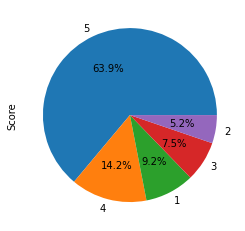

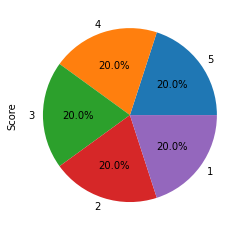

In [0]:
import matplotlib.pyplot as plt
# TODO: INSERT CODE HERE
# compute loss weights
data = [float(x) for x in train_df['Score'].value_counts().sort_index()]
percent = data/(train_df['Score'].count())
# loss_weights = np.array(1./percent)

loss_weights = np.array(data)
loss_weights = torch.from_numpy(loss_weights.max()/loss_weights).to(device)
# loss_weights = torch.from_numpy(loss_weights).to(device)
print(loss_weights)

def func(pct):
    return "{:.1f}%".format(pct)

train_df['Score'].value_counts().plot.pie(autopct=lambda pct: func(pct))
plt.figure()
val_df['Score'].value_counts().plot.pie(autopct=lambda pct: func(pct))

# Q3. Recurrent Amazon Reviews Classifier (25 pts)

We will now build the model for predicting the rating given the review. 

As we are working with text, we will first build a model which uses recurrent layers. Define a model for the classifier which uses *RNN*, *GRU*, *LSTM* and *BiLSTM* layers to predict the rating. You can make four different models or can make a single model with a `mode` parameter which defines which of the four recurrent layers to use. We highly recommend the latter approach, it will make the process much quicker.

**Define the basic recurrent model**

The model should have a `nn.Embedding` layer whose weights should be initialized to the pretrained embeddings downloaded above. The hidden state output from the last timestep should be passed to one (or more) fully connected layers to produce the output. For the *BiLSTM* model, you can choose to either add or concatenate the hidden state for the two directions (feel free to experiment with both and pick the one which works the best).

For this assignment, we will use the *F1 score* to monitor performance of the model. Check `sklearn.metrics.f1_score` to calculate the F1 score.

**NOTE:** Also we recommend you use `nn.utils.rnn.pad_packed_sequence` before passing the input to the recurrent layers. This will make sure the padding is ignored for every sample in a batch and the output will be from the actual last token for every sequence.

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import f1_score

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [0]:
class ReviewClassifier(nn.Module):
    """ 
    Review Classifier
  
    Here we give you the method header for the Review Classifier to make the process easier.
    You don't have to use this exact format, feel free to change the parameters as much as you
    would like, these are simply the parameters that our solution had.
  
    Parameters: 
    mode (string): Type of recurrent layer being used. Types are ['rnn', 'lstm', 'gru', 'bilstm']
    output_size (int): Size of the last layer for classification (hint: how many classes do you have?)
    hidden_size (int): Length of your hidden state vector
    vocab_size (int): Length of your vocab (can get this by doing len(TEXT.vocab))
    embedding_length (int): Dimension of your word embedding vector (hint: look at part 2c)
    word_embeddings (Tensor): All of the word embeddings generated. Can get this from TEXT.vocab.vectors
    """
    def __init__(self, mode, output_size, hidden_size, vocab_size, embedding_length, word_embeddings):
        super(ReviewClassifier, self).__init__()

        if mode not in ['rnn', 'lstm', 'gru', 'bilstm']:
            raise ValueError("Choose a mode from - rnn / lstm / gru / bilstm")

        # Defining some parameters
        self.hidden_size = hidden_size   
        self.embedding_length = embedding_length
        self.mode = mode

        # Defining embedding
        self.embeddings = nn.Embedding(vocab_size, embedding_length)
        self.embeddings.weight = nn.Parameter(word_embeddings.vectors, requires_grad=False)
        # pretrain_vector = word_embeddings.vectors
        # self.embeddings.weight.data.copy_(pretrain_vector)
        # UNK_IDX = word_embeddings.stoi[TEXT.unk_token]
        # PAD_IDX = word_embeddings.stoi[TEXT.pad_token]

        # # Weight not achieved on traininset should be set 0
        # self.embeddings.weight.data[UNK_IDX] = torch.zeros(embedding_length)
        # self.embeddings.weight.data[PAD_IDX] = torch.zeros(embedding_length)


        #Defining the layers
        if mode == 'rnn':
            self.n_layers = 1
            # RNN Layer
            self.net = nn.RNN(embedding_length, hidden_size, self.n_layers, batch_first=False)   
            # Fully connected layer
            self.fc = nn.Sequential(nn.Linear(hidden_size, output_size),
                        #   nn.ReLU(),
                        #   nn.Linear(200, 100),
                        #   nn.ReLU(),
                        #   nn.Linear(100, output_size),
                          nn.ReLU(),
                          )
            
        elif mode == 'lstm':
            self.n_layers = 2
            # LSTM layer
            self.net = nn.LSTM(embedding_length, hidden_size, self.n_layers, batch_first=False)   
            # Fully connected layer
            self.fc = nn.Sequential(nn.Linear(hidden_size, 200),
                          nn.ReLU(),
                          nn.Linear(200, 100),
                          nn.ReLU(),
                          nn.Linear(100, output_size),
                          nn.ReLU(),
                          ) 
            
        elif mode == 'gru':
            self.n_layers = 2
            # LSTM layer
            self.net = nn.GRU(embedding_length, hidden_size, self.n_layers, batch_first=False)   
            # Fully connected layer
            self.fc = nn.Sequential(nn.Linear(hidden_size, 200),
                          nn.ReLU(),
                          nn.Linear(200, 100),
                          nn.ReLU(),
                          nn.Linear(100, output_size),
                          nn.ReLU(),
                          ) 
        elif mode == 'bilstm':
            self.n_layers = 2
            # LSTM layer
            self.net = nn.LSTM(embedding_length, hidden_size, self.n_layers, batch_first=False, bidirectional=True)   
            # Fully connected layer
            self.fc = nn.Sequential(nn.Linear(hidden_size, 200),
                          nn.ReLU(),
                          nn.Linear(200, 100),
                          nn.ReLU(),
                          nn.Linear(100, output_size),
                          nn.ReLU(),
                          ) 

    def forward(self, text, text_lengths,):
        # TODO
        # embedding and pack 
        embeds = self.embeddings(text)
        packed_embeds = nn.utils.rnn.pack_padded_sequence(embeds, text_lengths)
        length = text_lengths.shape[0]
        
        if self.mode == 'rnn' or self.mode == 'gru':
            out, _ = self.net(packed_embeds)
            out, _ = nn.utils.rnn.pad_packed_sequence(out)
            out = self.fc(out[-1,:,:])

        elif self.mode == 'lstm' or self.mode == 'bilstm':
            _, (hidden, _) = self.net(packed_embeds)
            # print(hidden.shape)
            # out = hidden.squeeze(0)
            out = hidden[-1,:,:]
            out = self.fc(out)
        
        return out



In [0]:
def train_model(net, train_iter, optimizer, criterion, scheduler, EPOCH, tensorboard=False,):
    # initiate parameters
    test_f1_old = 0

    # training loop
    for epoch in range(EPOCH):
        running_loss = 0
        running_acc = 0
        pre_ls = np.array([])
        polar_ls = np.array([])
        # running_f1 = 0
        for idx, batch in enumerate(train_iter):
            optimizer.zero_grad()
            
            text, text_lengths = batch.Text

            polarity = batch.Score-1

            # make prediction 
            predictions = net(text.to(device), text_lengths)

            # compute accuracy
            pre = torch.argmax(predictions, dim=1)
            correct = torch.sum(pre == polarity)
            acc = (correct.float()*100. / text_lengths.shape[0]) 

            # loss backward
            loss = criterion(predictions, polarity.long())
            loss.backward()

            # prevent gradient vanishment
            nn.utils.clip_grad_norm_(net.parameters(), 5)

            # visualize loss and acc
            running_loss += loss.item()
            running_acc += acc

            # store polarity and prediction
            # running_f1 += f1_score(polarity.cpu().numpy(), pre.cpu().numpy(), average='macro')
            pre_ls = np.append(pre_ls, pre.cpu().numpy())
            polar_ls = np.append(polar_ls, polarity.cpu().numpy())

            optimizer.step()

            if (idx)%int(len(train_iter)/100)==0 and idx!=0 and tensorboard:
                logger.add_scalar(DATA_NAME1, running_loss/(idx+1), epoch*len(train_iter)+idx)  # tensorboard logger
                logger.add_scalar(DATA_NAME2, running_acc/(idx+1), epoch*len(train_iter)+idx)  # tensorboard logger
                logger.add_scalar(DATA_NAME3, running_f1/(idx+1), epoch*len(train_iter)+idx)  # tensorboard logger

            if (idx)%int(len(train_iter)/5)==0 and idx!=0:
                running_f1 = f1_score(polar_ls, pre_ls, average='macro')
                print('[epoch=%d, step=%5d] loss: %.3f acc: %.3f f1: %.3f' % (epoch+1, idx+1, running_loss / (idx+1), running_acc/(idx+1), running_f1))
                print("========================================================")
                if scheduler:
                    scheduler.step(loss)

        for param_group in optimizer.param_groups:
            print('LR:', param_group['lr'])

        # validation loss and accuracy
        _, _, test_loss, test_acc, test_f1 = test_model(net, val_iter, epoch)

        # save best model
        if test_f1 > test_f1_old:
            # best_model = net.state_dict().copy()
            torch.save(net.state_dict(), "/content/drive/My Drive/cis522/HW4/model/{}_model.pkl".format(net.mode)) 
            test_f1_old = test_f1

    # print best model loss and accuracy
    print("============ The best Model performance ===================")
    net.load_state_dict(torch.load("/content/drive/My Drive/cis522/HW4/model/{}_model.pkl".format(net.mode)))
    _, _, test_loss, test_acc, test_f1 = test_model(net, val_iter, -1)  
    print("================================================================") 

    return net  

def test_model(model, test_iter, epoch):
    pre_ls = np.array([])
    polar_ls = np.array([])
    with torch.no_grad():
        # for i in range(EPOCH):
        running_acc = 0
        running_loss = 0
        pre_ls = np.array([])
        for idx, batch in enumerate(test_iter):
            text, text_lengths = batch.Text
            # print(text_lengths.shape[0])
            # print(embedding_dim)
            polarity = batch.Score-1

            # make prediction 
            predictions = model(text.to(device), text_lengths)
            # print(predictions)

            loss = criterion(predictions, polarity.long())

            # running_loss += loss.item()
            pre = torch.argmax(predictions, dim=1)
            correct = torch.sum(pre == polarity)

            # print(correct)
            acc = (correct.float()*100. / text_lengths.shape[0]) 

            running_loss += loss.item()
            running_acc += acc

            pre_ls = np.append(pre_ls, pre.cpu().numpy())
            polar_ls = np.append(polar_ls, polarity.cpu().numpy())
            # optimizer.zero_grad()
      
    print('********************************************************')
    avg_loss = running_loss/(idx+1)
    avg_acc = running_acc/(idx+1)
    running_f1 = f1_score(polar_ls, pre_ls, average='macro')
    print('[epoch=%d] loss: %.3f acc: %.3f f1:%.3f' % (epoch+1, avg_loss, avg_acc, running_f1))
    print("********************************************************")

    return pre_ls, polar_ls, avg_loss, avg_acc, running_f1

In [0]:
# initiate parameters
learning_rate = 1e-4
vocab_length = len(vocab.vectors)
embedding_dim = vocab.vectors.shape[1]
hidden_size = 256

# initiate model 
net = ReviewClassifier('rnn', 5, hidden_size, vocab_length, embedding_dim, vocab)
net.load_state_dict(torch.load("/content/drive/My Drive/cis522/HW4/model/rnn_model.pkl"))
net.to(device)

# initiate loss and optimizer 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

# scheduler =  torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.8, patience=20, threshold=1e-4)
scheduler = None

rnn_model = train_model(net, train_iter, optimizer, criterion, scheduler, EPOCH=50, tensorboard=False,)

[epoch=1, step=  569] loss: 0.888 acc: 70.458 f1: 0.424
[epoch=1, step= 1137] loss: 0.881 acc: 70.589 f1: 0.427
[epoch=1, step= 1705] loss: 0.881 acc: 70.551 f1: 0.428
[epoch=1, step= 2273] loss: 0.884 acc: 70.443 f1: 0.425
[epoch=1, step= 2841] loss: 0.884 acc: 70.393 f1: 0.426
LR: 0.0001
********************************************************
[epoch=1] loss: 1.523 acc: 44.059 f1:0.375
********************************************************
[epoch=2, step=  569] loss: 0.877 acc: 70.686 f1: 0.430
[epoch=2, step= 1137] loss: 0.882 acc: 70.534 f1: 0.425
[epoch=2, step= 1705] loss: 0.884 acc: 70.364 f1: 0.424
[epoch=2, step= 2273] loss: 0.880 acc: 70.503 f1: 0.428
[epoch=2, step= 2841] loss: 0.883 acc: 70.421 f1: 0.426
LR: 0.0001
********************************************************
[epoch=2] loss: 1.509 acc: 44.802 f1:0.407
********************************************************
[epoch=3, step=  569] loss: 0.864 acc: 70.952 f1: 0.440
[epoch=3, step= 1137] loss: 0.872 acc: 70.700 f1

********************************************************
[epoch=0] loss: 0.795 acc: 73.987 f1:0.534
********************************************************
********************************************************
[epoch=0] loss: 1.420 acc: 50.507 f1:0.485
********************************************************
train data f1 score =  0.5343830424085657
val data f1 score =  0.48464974705755887


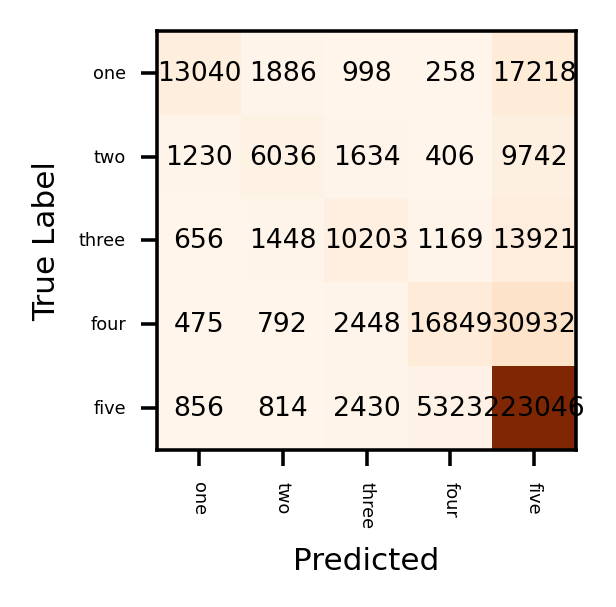

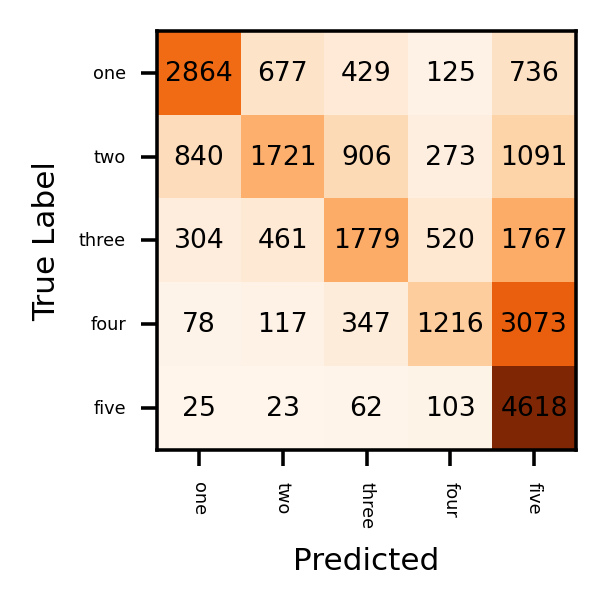

In [0]:
from sklearn.metrics import f1_score
# init net
vocab_length = len(vocab.vectors)
embedding_dim = vocab.vectors.shape[1]
hidden_size = 256
net = ReviewClassifier('rnn', 5, hidden_size, vocab_length, embedding_dim, vocab)
net.to(device)

# load param
net.load_state_dict(torch.load("/content/drive/My Drive/cis522/HW4/model/{}_model.pkl".format('rnn')))

# loss
criterion = nn.CrossEntropyLoss()

# prediction
train_pre, train_polar, _, _, train_f1= test_model(net, train_iter, -1) 
val_pre, val_polar, _, _, val_f1 = test_model(net, val_iter, -1) 

# f1 score
# train_f1 = f1_score(train_pre+1, train_score, average='macro')
print('train data f1 score = ', train_f1)

# val_f1 = f1_score(val_pre+1, val_score, average='macro')
print('val data f1 score = ', val_f1)

plot_confusion_matrix(train_polar, train_pre, None, ["one","two","three","four","five"], title='Confusion matrix', tensor_name = 'MyFigure/image', normalize=False)
plot_confusion_matrix(val_polar, val_pre, None, ["one","two","three","four","five"], title='Confusion matrix', tensor_name = 'MyFigure/image', normalize=False)

In [0]:
rnn_model.parameters

<bound method Module.parameters of ReviewClassifier(
  (embeddings): Embedding(157474, 300)
  (net): RNN(300, 512)
  (fc): Sequential(
    (0): Linear(in_features=512, out_features=200, bias=True)
    (1): ReLU()
    (2): Linear(in_features=200, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=5, bias=True)
    (5): ReLU()
  )
)>

**Train the Recurrent Models**

**Q3b (2 pts):** Train the model defined above with *LSTM* as the recurrent layer. Use the standard `nn.CrossEntropyLoss` as the loss function.  Report the final training F1 score and the final training loss of the model (trained only on the training set). Use the trained model to evaluate on the validation data. Report the validation F1 score. Use the `plot_confusion_matrix` function to display the confusion matrix for the validation set. Report this confusion matrix to your write-up. Report your final hyper-parameter choices in your writeup as well as your hyper-parameter tuning process.

In [0]:
# initiate parameters
learning_rate = 3e-4
vocab_length = len(vocab.vectors)
embedding_dim = vocab.vectors.shape[1]
hidden_size = 128

# initiate model 
net = ReviewClassifier('gru', 5, hidden_size, vocab_length, embedding_dim, vocab)
net.to(device)

# initiate loss and optimizer 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

# scheduler =  torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.8, patience=20, threshold=1e-4)
scheduler = None

gru_model = train_model(net, train_iter, optimizer, criterion, scheduler, EPOCH=50, tensorboard=False,)

[epoch=1, step=  569] loss: 1.185 acc: 63.943
[epoch=1, step= 1137] loss: 1.127 acc: 64.034
[epoch=1, step= 1705] loss: 1.104 acc: 64.073
[epoch=1, step= 2273] loss: 1.093 acc: 64.014
[epoch=1, step= 2841] loss: 1.086 acc: 64.031
LR: 0.0003
********************************************************
[epoch=1] loss: 1.881 acc: 20.669
********************************************************
[epoch=2, step=  569] loss: 1.049 acc: 64.337
[epoch=2, step= 1137] loss: 1.044 acc: 64.451
[epoch=2, step= 1705] loss: 1.043 acc: 64.455
[epoch=2, step= 2273] loss: 1.041 acc: 64.469
[epoch=2, step= 2841] loss: 1.033 acc: 64.457
LR: 0.0003
********************************************************
[epoch=2] loss: 1.664 acc: 23.344
********************************************************
[epoch=3, step=  569] loss: 0.982 acc: 64.808
[epoch=3, step= 1137] loss: 0.980 acc: 64.800
[epoch=3, step= 1705] loss: 0.976 acc: 64.806
[epoch=3, step= 2273] loss: 0.976 acc: 64.788
[epoch=3, step= 2841] loss: 0.975 acc:

********************************************************
[epoch=0] loss: 0.704 acc: 76.836 f1:0.505
********************************************************
********************************************************
[epoch=0] loss: 1.728 acc: 48.645 f1:0.422
********************************************************
train data f1 score =  0.5049822920452461
val data f1 score =  0.42165698361373083


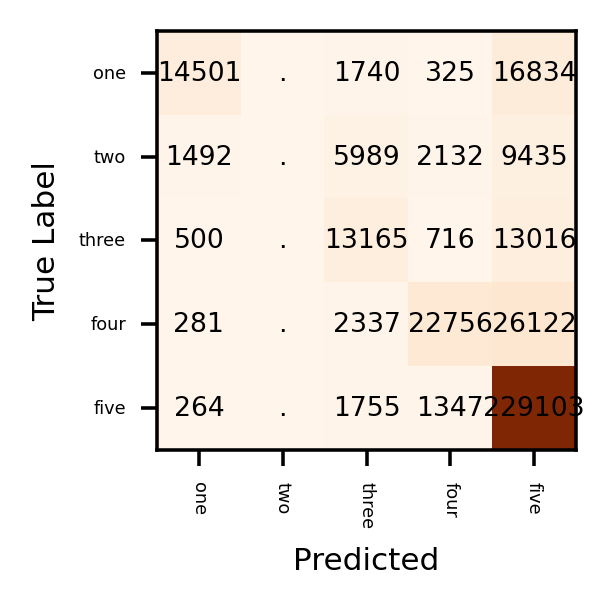

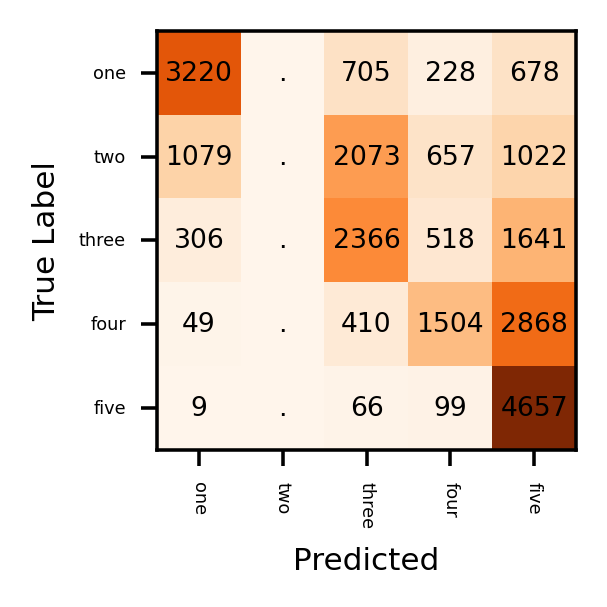

In [0]:
from sklearn.metrics import f1_score
# init net
vocab_length = len(vocab.vectors)
embedding_dim = vocab.vectors.shape[1]
hidden_size = 128
net = ReviewClassifier('gru', 5, hidden_size, vocab_length, embedding_dim, vocab)
net.to(device)

# load param
net.load_state_dict(torch.load("/content/drive/My Drive/cis522/HW4/model/{}_model.pkl".format('gru')))

# loss
criterion = nn.CrossEntropyLoss()

# prediction
train_pre, train_polar, _, _, train_f1= test_model(net, train_iter, -1) 
val_pre, val_polar, _, _, val_f1 = test_model(net, val_iter, -1) 

# f1 score
# train_f1 = f1_score(train_pre+1, train_score, average='macro')
print('train data f1 score = ', train_f1)

# val_f1 = f1_score(val_pre+1, val_score, average='macro')
print('val data f1 score = ', val_f1)

plot_confusion_matrix(train_polar, train_pre, None, ["one","two","three","four","five"], title='Confusion matrix', tensor_name = 'MyFigure/image', normalize=False)
plot_confusion_matrix(val_polar, val_pre, None, ["one","two","three","four","five"], title='Confusion matrix', tensor_name = 'MyFigure/image', normalize=False)

In [0]:
# initiate parameters
learning_rate = 5e-4
vocab_length = len(vocab.vectors)
embedding_dim = vocab.vectors.shape[1]
hidden_size = 256

# initiate model 
net = ReviewClassifier('lstm', 5, hidden_size, vocab_length, embedding_dim, vocab)
net.to(device)

# initiate loss and optimizer 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.8)

# scheduler =  torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.8, patience=20, threshold=1e-4)
scheduler = None

lstm_model = train_model(net, train_iter, optimizer, criterion, scheduler, EPOCH=20, tensorboard=False,)

[epoch=1, step=  569] loss: 1.099 acc: 63.178
[epoch=1, step= 1137] loss: 1.034 acc: 64.451
[epoch=1, step= 1705] loss: 0.998 acc: 65.716
[epoch=1, step= 2273] loss: 0.972 acc: 66.794
[epoch=1, step= 2841] loss: 0.953 acc: 67.539
LR: 0.0005
********************************************************
[epoch=1] loss: 1.537 acc: 41.782
********************************************************
[epoch=2, step=  569] loss: 0.843 acc: 71.709
[epoch=2, step= 1137] loss: 0.844 acc: 71.627
[epoch=2, step= 1705] loss: 0.841 acc: 71.788
[epoch=2, step= 2273] loss: 0.840 acc: 71.825
[epoch=2, step= 2841] loss: 0.836 acc: 71.931
LR: 0.0005
********************************************************
[epoch=2] loss: 1.443 acc: 44.239
********************************************************
[epoch=3, step=  569] loss: 0.805 acc: 72.994
[epoch=3, step= 1137] loss: 0.801 acc: 73.137
[epoch=3, step= 1705] loss: 0.798 acc: 73.229
[epoch=3, step= 2273] loss: 0.795 acc: 73.378
[epoch=3, step= 2841] loss: 0.793 acc:

In [0]:
# initiate parameters
learning_rate = 5e-4
vocab_length = len(vocab.vectors)
embedding_dim = vocab.vectors.shape[1]
hidden_size = 256

# initiate model 
net = ReviewClassifier('bilstm', 5, hidden_size, vocab_length, embedding_dim, vocab)
net.to(device)

# initiate loss and optimizer 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.8)

# scheduler =  torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.8, patience=20, threshold=1e-4)
scheduler = None

bilstm_model = train_model(net, train_iter, optimizer, criterion, scheduler, EPOCH=20, tensorboard=False,)

[epoch=1, step=  569] loss: 1.151 acc: 63.859
[epoch=1, step= 1137] loss: 1.111 acc: 63.814
[epoch=1, step= 1705] loss: 1.068 acc: 64.219
[epoch=1, step= 2273] loss: 1.031 acc: 65.257
[epoch=1, step= 2841] loss: 1.002 acc: 66.166
LR: 0.0005
********************************************************
[epoch=1] loss: 1.592 acc: 39.627
********************************************************
[epoch=2, step=  569] loss: 0.853 acc: 71.401
[epoch=2, step= 1137] loss: 0.847 acc: 71.585
[epoch=2, step= 1705] loss: 0.840 acc: 71.852
[epoch=2, step= 2273] loss: 0.834 acc: 72.019
[epoch=2, step= 2841] loss: 0.824 acc: 72.209
LR: 0.0005
********************************************************
[epoch=2] loss: 1.425 acc: 43.788
********************************************************
[epoch=3, step=  569] loss: 0.682 acc: 74.834
[epoch=3, step= 1137] loss: 0.677 acc: 75.027
[epoch=3, step= 1705] loss: 0.669 acc: 75.297
[epoch=3, step= 2273] loss: 0.665 acc: 75.487
[epoch=3, step= 2841] loss: 0.660 acc:

********************************************************
[epoch=0] loss: 0.243 acc: 89.916 f1:0.690
********************************************************
********************************************************
[epoch=0] loss: 1.343 acc: 57.401 f1:0.510
********************************************************
train data f1 score =  0.6898369498982142
val data f1 score =  0.5102829836729119


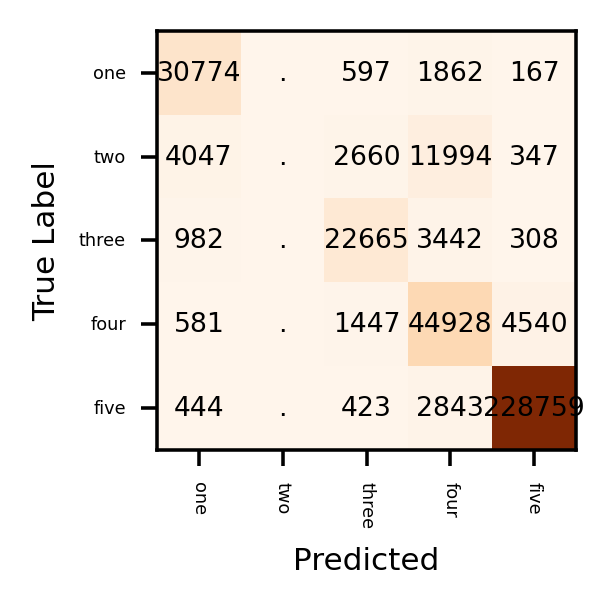

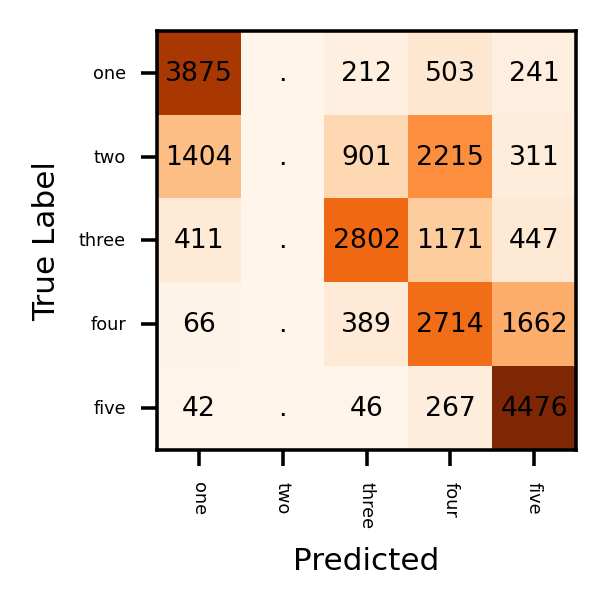

In [0]:
from sklearn.metrics import f1_score
# init net
vocab_length = len(vocab.vectors)
embedding_dim = vocab.vectors.shape[1]
hidden_size = 256
net = ReviewClassifier('bilstm', 5, hidden_size, vocab_length, embedding_dim, vocab)
net.to(device)

# load param
net.load_state_dict(torch.load("/content/drive/My Drive/cis522/HW4/model/{}_model.pkl".format('bilstm')))

# loss
criterion = nn.CrossEntropyLoss()

# prediction
train_pre, train_polar, _, _, train_f1= test_model(net, train_iter, -1) 
val_pre, val_polar, _, _, val_f1 = test_model(net, val_iter, -1) 

# f1 score
# train_f1 = f1_score(train_pre+1, train_score, average='macro')
print('train data f1 score = ', train_f1)

# val_f1 = f1_score(val_pre+1, val_score, average='macro')
print('val data f1 score = ', val_f1)

plot_confusion_matrix(train_polar, train_pre, None, ["one","two","three","four","five"], title='Confusion matrix', tensor_name = 'MyFigure/image', normalize=False)
plot_confusion_matrix(val_polar, val_pre, None, ["one","two","three","four","five"], title='Confusion matrix', tensor_name = 'MyFigure/image', normalize=False)

********************************************************
[epoch=0] loss: 0.425 acc: 88.289 f1:0.669
********************************************************
********************************************************
[epoch=0] loss: 1.887 acc: 54.066 f1:0.484
********************************************************
train data f1 score =  0.668981047017468
val data f1 score =  0.48358114437042266


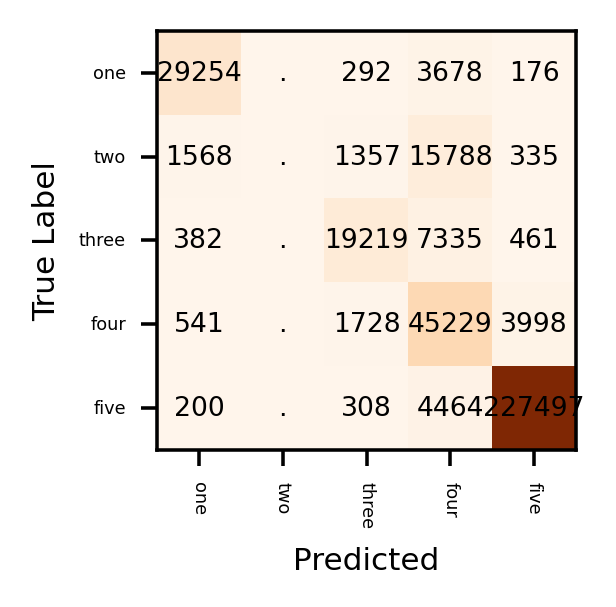

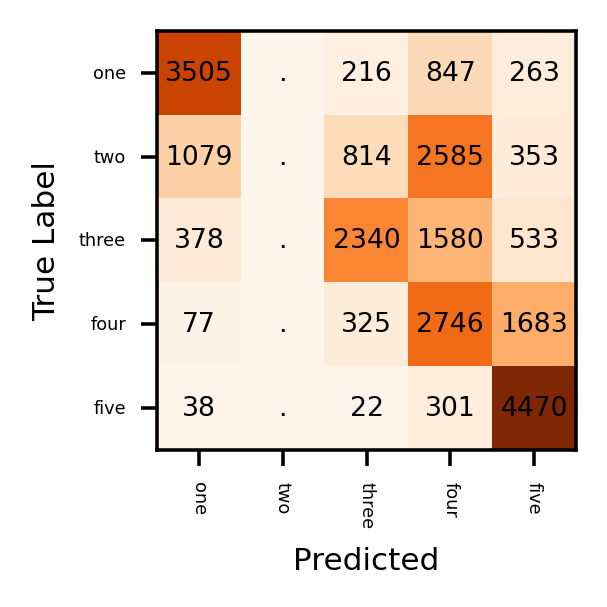

In [0]:
from sklearn.metrics import f1_score
# init net
vocab_length = len(vocab.vectors)
embedding_dim = vocab.vectors.shape[1]
hidden_size = 256
net = ReviewClassifier('lstm', 5, hidden_size, vocab_length, embedding_dim, vocab)
net.to(device)

# load param
net.load_state_dict(torch.load("/content/drive/My Drive/cis522/HW4/model/{}_model.pkl".format('lstm')))

# loss
criterion = nn.CrossEntropyLoss()

# prediction
train_pre, train_polar, _, _, train_f1= test_model(net, train_iter, -1) 
val_pre, val_polar, _, _, val_f1 = test_model(net, val_iter, -1) 

# f1 score
# train_f1 = f1_score(train_pre+1, train_score, average='macro')
print('train data f1 score = ', train_f1)

# val_f1 = f1_score(val_pre+1, val_score, average='macro')
print('val data f1 score = ', val_f1)

plot_confusion_matrix(train_polar, train_pre, None, ["one","two","three","four","five"], title='Confusion matrix', tensor_name = 'MyFigure/image', normalize=False)
plot_confusion_matrix(val_polar, val_pre, None, ["one","two","three","four","five"], title='Confusion matrix', tensor_name = 'MyFigure/image', normalize=False)

**Q3c (2 pts):** What issue do you find after looking at the confusion matrix? What according to you is the reason for this difference? What would you do to fix it? *Hint:* Note what you observed in Q2e. The fix has something to do with the loss function.

In [0]:
def train_model_cb(net, train_iter, optimizer, criterion, scheduler, EPOCH, tensorboard=False,):
    # initiate parameters
    test_f1_old = 0

    # training loop
    for epoch in range(EPOCH):
        running_loss = 0
        running_acc = 0
        pre_ls = np.array([])
        polar_ls = np.array([])
        # running_f1 = 0
        for idx, batch in enumerate(train_iter):
            optimizer.zero_grad()
            
            text, text_lengths = batch.Text

            polarity = batch.Score-1

            # make prediction 
            predictions = net(text.to(device), text_lengths)

            # compute accuracy
            pre = torch.argmax(predictions, dim=1)
            correct = torch.sum(pre == polarity)
            acc = (correct.float()*100. / text_lengths.shape[0]) 

            # loss backward
            loss = criterion(predictions, polarity.long())
            loss.backward()

            # prevent gradient vanishment
            nn.utils.clip_grad_norm_(net.parameters(), 5)

            # visualize loss and acc
            running_loss += loss.item()
            running_acc += acc

            # store polarity and prediction
            # running_f1 += f1_score(polarity.cpu().numpy(), pre.cpu().numpy(), average='macro')
            pre_ls = np.append(pre_ls, pre.cpu().numpy())
            polar_ls = np.append(polar_ls, polarity.cpu().numpy())

            optimizer.step()

            if (idx)%int(len(train_iter)/100)==0 and idx!=0 and tensorboard:
                running_f1 = f1_score(polar_ls, pre_ls, average='macro')
                logger.add_scalar(DATA_NAME1, running_loss/(idx+1), epoch*len(train_iter)+idx)  # tensorboard logger
                logger.add_scalar(DATA_NAME2, running_f1, epoch*len(train_iter)+idx)  # tensorboard logger
                # logger.add_scalar(DATA_NAME3, running_f1/(idx+1), epoch*len(train_iter)+idx)  # tensorboard logger

            if (idx)%int(len(train_iter)/5)==0 and idx!=0:
                running_f1 = f1_score(polar_ls, pre_ls, average='macro')
                print('[epoch=%d, step=%5d] loss: %.3f acc: %.3f f1: %.3f' % (epoch+1, idx+1, running_loss / (idx+1), running_acc/(idx+1), running_f1))
                print("========================================================")
                if scheduler:
                    scheduler.step(loss)

        for param_group in optimizer.param_groups:
            print('LR:', param_group['lr'])

        # validation loss and accuracy
        _, _, test_loss, test_acc, test_f1 = test_model(net, val_iter, epoch)

        # save best model
        if test_f1 > test_f1_old:
            # best_model = net.state_dict().copy()
            torch.save(net.state_dict(), "/content/drive/My Drive/cis522/HW4/model/{}_model_cb.pkl".format(net.mode)) 
            test_f1_old = test_f1

    # print best model loss and accuracy
    print("============ The best Model performance ===================")
    net.load_state_dict(torch.load("/content/drive/My Drive/cis522/HW4/model/{}_model_cb.pkl".format(net.mode)))
    _, _, test_loss, test_acc, test_f1 = test_model(net, val_iter, -1)  
    print("================================================================") 

    return net  


**Q3d (2 pts):** Now redo 3b except with the fix for the problem that you noted in Q3c. Report all the same things in your writeup, and explain how adding this fix impacted results. Use the confusion matrix and the F1 Score in your analysis.

In [0]:
%load_ext tensorboard
from torch.utils.tensorboard import SummaryWriter
from torch import Tensor
import os

ROOT_LOG_DIR = "/content/drive/My Drive/cis522/HW4"
TENSORBOARD_DIR = "rnn" # Sub-Directory for storing this specific experiment's logs
logger = SummaryWriter(os.path.join(ROOT_LOG_DIR, TENSORBOARD_DIR))
DATA_NAME1 = "Loss_Curve" 
DATA_NAME2 = "F1_Curve"

# !kill 1622

In [0]:
%tensorboard --logdir {ROOT_LOG_DIR.replace(" ", "\\ ")}

Reusing TensorBoard on port 6006 (pid 4134), started 0:01:27 ago. (Use '!kill 4134' to kill it.)

<IPython.core.display.Javascript object>

In [0]:
# TODO: INSERT CODE HERE
# initiate parameters
learning_rate = 1e-4
vocab_length = len(vocab.vectors)
embedding_dim = vocab.vectors.shape[1]
hidden_size = 256

# initiate model 
net = ReviewClassifier('rnn', 5, hidden_size, vocab_length, embedding_dim, vocab)
# net.load_state_dict(torch.load("/content/drive/My Drive/cis522/HW4/model/rnn_model_cb.pkl"))
net.to(device)

# initiate loss and optimizer 
criterion = nn.CrossEntropyLoss(weight=loss_weights.float())
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.8)

# scheduler =  torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.8, patience=20, threshold=1e-4)
scheduler = None

rnn_model = train_model_cb(net, train_iter, optimizer, criterion, scheduler, EPOCH=100, tensorboard=True,)

[epoch=1, step=  569] loss: 1.601 acc: 42.102 f1: 0.217
[epoch=1, step= 1137] loss: 1.573 acc: 47.614 f1: 0.246
[epoch=1, step= 1705] loss: 1.556 acc: 50.249 f1: 0.258
[epoch=1, step= 2273] loss: 1.544 acc: 51.763 f1: 0.267
[epoch=1, step= 2841] loss: 1.536 acc: 52.736 f1: 0.272
LR: 0.0001
********************************************************
[epoch=1] loss: 1.474 acc: 39.181 f1:0.360
********************************************************
[epoch=2, step=  569] loss: 1.500 acc: 56.780 f1: 0.301
[epoch=2, step= 1137] loss: 1.495 acc: 56.870 f1: 0.302
[epoch=2, step= 1705] loss: 1.496 acc: 56.829 f1: 0.302
[epoch=2, step= 2273] loss: 1.494 acc: 56.896 f1: 0.303
[epoch=2, step= 2841] loss: 1.493 acc: 57.018 f1: 0.304
LR: 0.0001
********************************************************
[epoch=2] loss: 1.424 acc: 41.563 f1:0.384
********************************************************
[epoch=3, step=  569] loss: 1.485 acc: 57.309 f1: 0.309
[epoch=3, step= 1137] loss: 1.486 acc: 57.498 f1

In [0]:
TENSORBOARD_DIR = "lstm" # Sub-Directory for storing this specific experiment's logs
logger = SummaryWriter(os.path.join(ROOT_LOG_DIR, TENSORBOARD_DIR))
DATA_NAME1 = "Loss_Curve" 
DATA_NAME2 = "F1_Curve"

In [0]:
TENSORBOARD_DIR = "gru" # Sub-Directory for storing this specific experiment's logs
logger = SummaryWriter(os.path.join(ROOT_LOG_DIR, TENSORBOARD_DIR))
DATA_NAME1 = "Loss_Curve" 
DATA_NAME2 = "F1_Curve"

In [0]:
# TODO: INSERT CODE HERE
# initiate parameters
learning_rate = 1e-4
vocab_length = len(vocab.vectors)
embedding_dim = vocab.vectors.shape[1]
hidden_size = 256

# initiate model 
net = ReviewClassifier('lstm', 5, hidden_size, vocab_length, embedding_dim, vocab)
# net.load_state_dict(torch.load("/content/drive/My Drive/cis522/HW4/model/rnn_model_cb.pkl"))
net.to(device)

# initiate loss and optimizer 
criterion = nn.CrossEntropyLoss(weight=loss_weights.float())
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

# scheduler =  torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.8, patience=20, threshold=1e-4)
scheduler = None

rnn_model = train_model_cb(net, train_iter, optimizer, criterion, scheduler, EPOCH=50, tensorboard=True,)

[epoch=1, step=  569] loss: 1.502 acc: 46.197 f1: 0.251
[epoch=1, step= 1137] loss: 1.439 acc: 47.856 f1: 0.302
[epoch=1, step= 1705] loss: 1.396 acc: 49.548 f1: 0.329
[epoch=1, step= 2273] loss: 1.369 acc: 50.675 f1: 0.345
[epoch=1, step= 2841] loss: 1.346 acc: 51.797 f1: 0.357
LR: 0.0001
********************************************************
[epoch=1] loss: 1.322 acc: 45.680 f1:0.442
********************************************************
[epoch=2, step=  569] loss: 1.231 acc: 56.912 f1: 0.420
[epoch=2, step= 1137] loss: 1.224 acc: 56.875 f1: 0.420
[epoch=2, step= 1705] loss: 1.215 acc: 57.289 f1: 0.424
[epoch=2, step= 2273] loss: 1.207 acc: 57.598 f1: 0.428
[epoch=2, step= 2841] loss: 1.201 acc: 57.834 f1: 0.431
LR: 0.0001
********************************************************
[epoch=2] loss: 1.297 acc: 49.440 f1:0.478
********************************************************
[epoch=3, step=  569] loss: 1.158 acc: 59.522 f1: 0.450
[epoch=3, step= 1137] loss: 1.151 acc: 59.549 f1

In [0]:
# initiate parameters
learning_rate = 1e-4
vocab_length = len(vocab.vectors)
embedding_dim = vocab.vectors.shape[1]
hidden_size = 256

# initiate model 
net = ReviewClassifier('gru', 5, hidden_size, vocab_length, embedding_dim, vocab)
net.to(device)

# initiate loss and optimizer 
criterion = nn.CrossEntropyLoss(weight=loss_weights.float())
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

# scheduler =  torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.8, patience=20, threshold=1e-4)
scheduler = None

gru_model = train_model_cb(net, train_iter, optimizer, criterion, scheduler, EPOCH=50, tensorboard=True,)

[epoch=1, step=  569] loss: 1.591 acc: 44.493 f1: 0.176
[epoch=1, step= 1137] loss: 1.569 acc: 51.632 f1: 0.221
[epoch=1, step= 1705] loss: 1.552 acc: 54.093 f1: 0.244
[epoch=1, step= 2273] loss: 1.541 acc: 55.643 f1: 0.256
[epoch=1, step= 2841] loss: 1.533 acc: 56.637 f1: 0.263
LR: 0.0001
********************************************************
[epoch=1] loss: 1.450 acc: 38.910 f1:0.327
********************************************************
[epoch=2, step=  569] loss: 1.486 acc: 60.745 f1: 0.300
[epoch=2, step= 1137] loss: 1.480 acc: 61.209 f1: 0.304
[epoch=2, step= 1705] loss: 1.472 acc: 61.206 f1: 0.314
[epoch=2, step= 2273] loss: 1.457 acc: 60.901 f1: 0.327
[epoch=2, step= 2841] loss: 1.447 acc: 60.647 f1: 0.334
LR: 0.0001
********************************************************
[epoch=2] loss: 1.356 acc: 45.107 f1:0.416
********************************************************
[epoch=3, step=  569] loss: 1.404 acc: 60.733 f1: 0.358
[epoch=3, step= 1137] loss: 1.399 acc: 60.979 f1

In [0]:
TENSORBOARD_DIR = "bilstm" # Sub-Directory for storing this specific experiment's logs
logger = SummaryWriter(os.path.join(ROOT_LOG_DIR, TENSORBOARD_DIR))
DATA_NAME1 = "Loss_Curve" 
DATA_NAME2 = "F1_Curve"

In [0]:
# TODO: INSERT CODE HERE
# initiate parameters
learning_rate = 1e-4
vocab_length = len(vocab.vectors)
embedding_dim = vocab.vectors.shape[1]
hidden_size = 256

# initiate model 
net = ReviewClassifier('bilstm', 5, hidden_size, vocab_length, embedding_dim, vocab)
# net.load_state_dict(torch.load("/content/drive/My Drive/cis522/HW4/model/rnn_model_cb.pkl"))
net.to(device)

# initiate loss and optimizer 
criterion = nn.CrossEntropyLoss(weight=loss_weights.float())
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

# scheduler =  torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.8, patience=20, threshold=1e-4)
scheduler = None

rnn_model = train_model_cb(net, train_iter, optimizer, criterion, scheduler, EPOCH=50, tensorboard=True,)

[epoch=1, step=  569] loss: 1.554 acc: 41.636 f1: 0.182
[epoch=1, step= 1137] loss: 1.510 acc: 44.491 f1: 0.233
[epoch=1, step= 1705] loss: 1.466 acc: 47.795 f1: 0.287
[epoch=1, step= 2273] loss: 1.428 acc: 49.176 f1: 0.316
[epoch=1, step= 2841] loss: 1.397 acc: 50.409 f1: 0.335
LR: 0.0001
********************************************************
[epoch=1] loss: 1.392 acc: 41.767 f1:0.406
********************************************************
[epoch=2, step=  569] loss: 1.242 acc: 56.034 f1: 0.411
[epoch=2, step= 1137] loss: 1.229 acc: 56.747 f1: 0.419
[epoch=2, step= 1705] loss: 1.221 acc: 56.914 f1: 0.424
[epoch=2, step= 2273] loss: 1.211 acc: 57.238 f1: 0.428
[epoch=2, step= 2841] loss: 1.202 acc: 57.535 f1: 0.432
LR: 0.0001
********************************************************
[epoch=2] loss: 1.235 acc: 49.392 f1:0.491
********************************************************
[epoch=3, step=  569] loss: 1.148 acc: 59.054 f1: 0.453
[epoch=3, step= 1137] loss: 1.139 acc: 59.663 f1

**Q3e (10 pts):** Train the model with the other three recurrent layers. Plot the training loss and training F1 score for all four (including the one trained in Q3b-d) models on the same graph. (You will provide two plots, one with the training loss for all 4 models and the other with the training F1 score for all 4 models). Also report the confusion matrix for all the four trained models for the validation set. What do you observe? Compare the four models and provide a rough intuition as to why the models performed the way they did. 

********************************************************
[epoch=0] loss: 1.186 acc: 66.546 f1:0.523
********************************************************
********************************************************
[epoch=0] loss: 1.467 acc: 51.837 f1:0.507
********************************************************
train data f1 score =  0.5230403494992918
val data f1 score =  0.5071275731132878


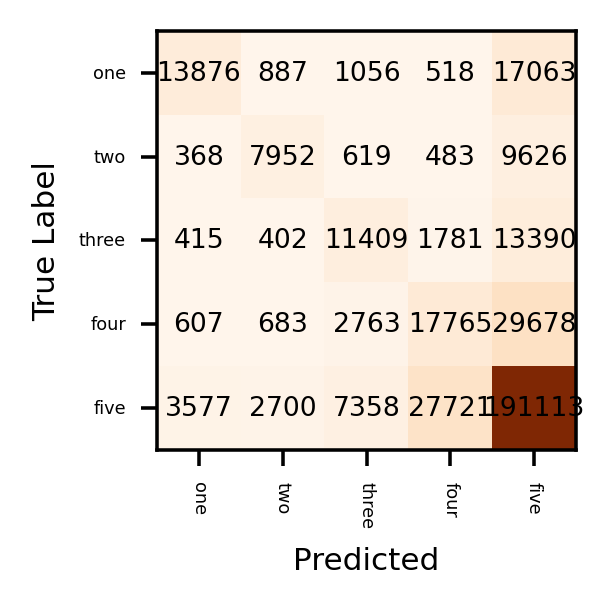

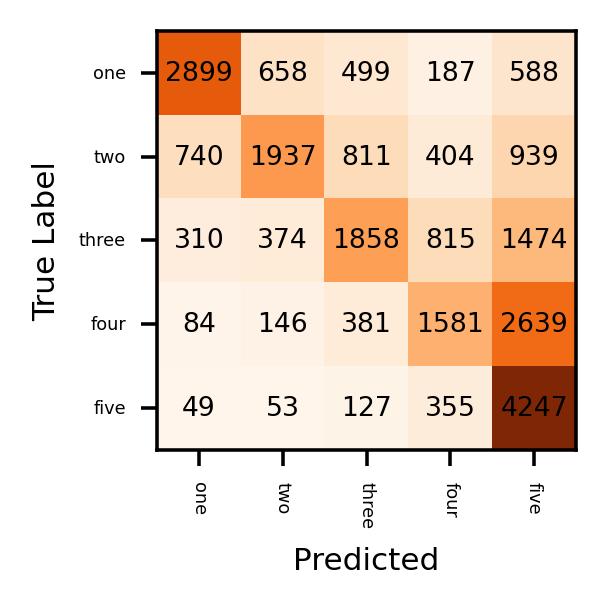

In [0]:
from sklearn.metrics import f1_score
# init net
vocab_length = len(vocab.vectors)
embedding_dim = vocab.vectors.shape[1]
hidden_size = 256
net = ReviewClassifier('rnn', 5, hidden_size, vocab_length, embedding_dim, vocab)
net.to(device)

# load param
net.load_state_dict(torch.load("/content/drive/My Drive/cis522/HW4/model/{}_model_cb.pkl".format('rnn')))

# loss
criterion = nn.CrossEntropyLoss(weight=loss_weights.float())

# prediction
train_pre, train_polar, _, _, train_f1= test_model(net, train_iter, -1) 
val_pre, val_polar, _, _, val_f1 = test_model(net, val_iter, -1) 

# f1 score
# train_f1 = f1_score(train_pre+1, train_score, average='macro')
print('train data f1 score = ', train_f1)

# val_f1 = f1_score(val_pre+1, val_score, average='macro')
print('val data f1 score = ', val_f1)

plot_confusion_matrix(train_polar, train_pre, None, ["one","two","three","four","five"], title='Confusion matrix', tensor_name = 'MyFigure/image', normalize=False)
plot_confusion_matrix(val_polar, val_pre, None, ["one","two","three","four","five"], title='Confusion matrix', tensor_name = 'MyFigure/image', normalize=False)

********************************************************
[epoch=0] loss: 0.129 acc: 90.113 f1:0.901
********************************************************
********************************************************
[epoch=0] loss: 3.008 acc: 66.628 f1:0.663
********************************************************
train data f1 score =  0.901362635176319
val data f1 score =  0.663298424741984


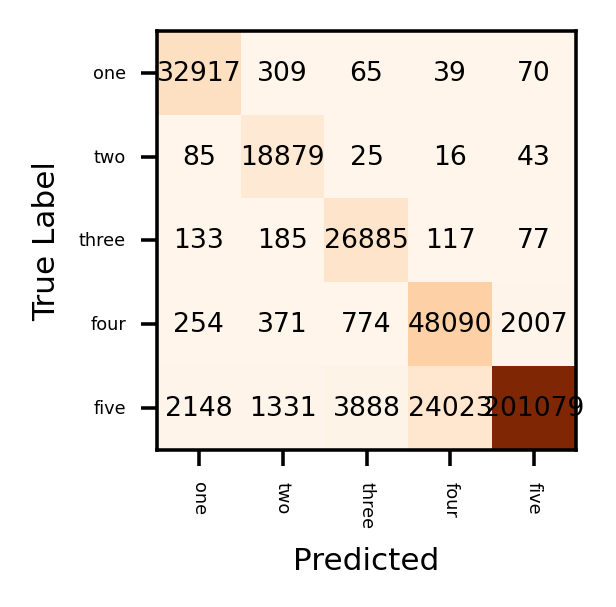

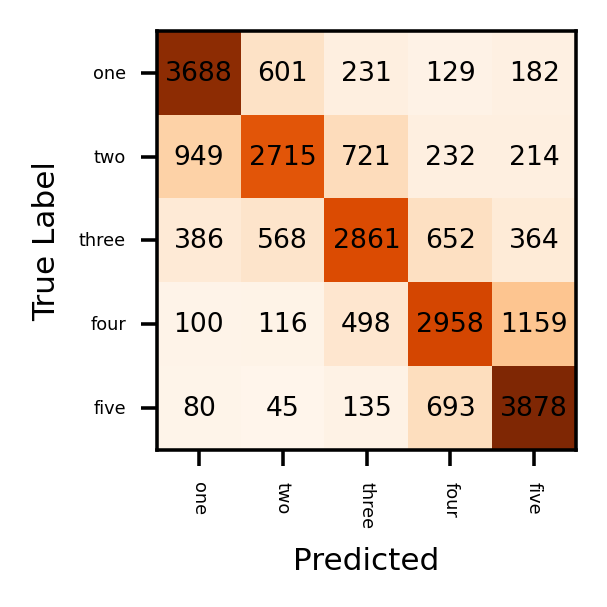

In [0]:
# TODO: INSERT CODE HERE
from sklearn.metrics import f1_score
# init net
vocab_length = len(vocab.vectors)
embedding_dim = vocab.vectors.shape[1]
hidden_size = 256
net = ReviewClassifier('lstm', 5, hidden_size, vocab_length, embedding_dim, vocab)
net.to(device)

# load param
net.load_state_dict(torch.load("/content/drive/My Drive/cis522/HW4/model/{}_model_cb.pkl".format('lstm')))

# loss
criterion = nn.CrossEntropyLoss(weight=loss_weights.float())

# prediction
train_pre, train_polar, _, _, train_f1= test_model(net, train_iter, -1) 
val_pre, val_polar, _, _, val_f1 = test_model(net, val_iter, -1) 

# f1 score
# train_f1 = f1_score(train_pre+1, train_score, average='macro')
print('train data f1 score = ', train_f1)

# val_f1 = f1_score(val_pre+1, val_score, average='macro')
print('val data f1 score = ', val_f1)

plot_confusion_matrix(train_polar, train_pre, None, ["one","two","three","four","five"], title='Confusion matrix', tensor_name = 'MyFigure/image', normalize=False)
plot_confusion_matrix(val_polar, val_pre, None, ["one","two","three","four","five"], title='Confusion matrix', tensor_name = 'MyFigure/image', normalize=False)

********************************************************
[epoch=0] loss: 0.932 acc: 75.141 f1:0.636
********************************************************
********************************************************
[epoch=0] loss: 1.814 acc: 57.583 f1:0.566
********************************************************
train data f1 score =  0.6356359527929151
val data f1 score =  0.5657468179223523


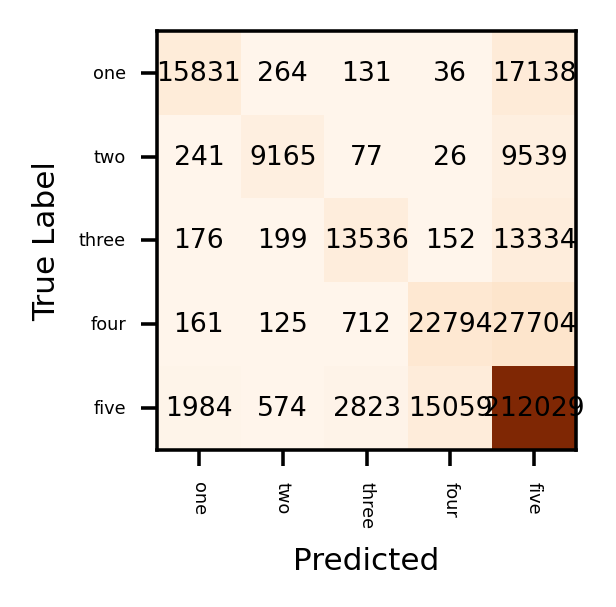

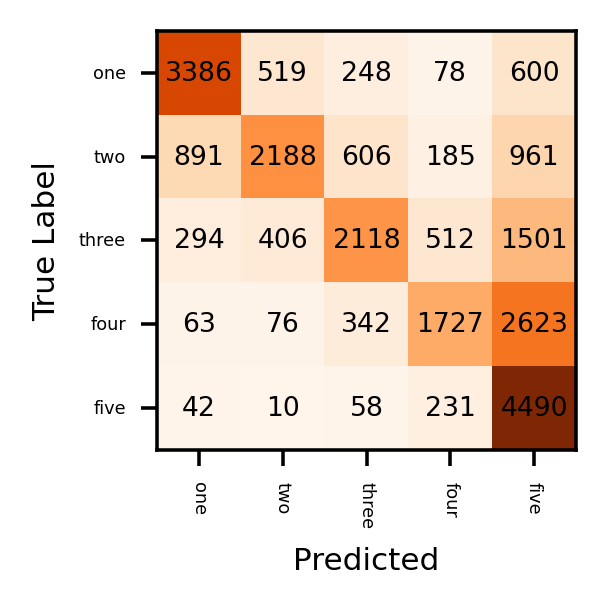

In [0]:
from sklearn.metrics import f1_score
# init net
vocab_length = len(vocab.vectors)
embedding_dim = vocab.vectors.shape[1]
hidden_size = 256
net = ReviewClassifier('gru', 5, hidden_size, vocab_length, embedding_dim, vocab)
net.to(device)

# load param
net.load_state_dict(torch.load("/content/drive/My Drive/cis522/HW4/model/{}_model_cb.pkl".format('gru')))

# loss
criterion = nn.CrossEntropyLoss(weight=loss_weights.float())

# prediction
train_pre, train_polar, _, _, train_f1= test_model(net, train_iter, -1) 
val_pre, val_polar, _, _, val_f1 = test_model(net, val_iter, -1) 

# f1 score
# train_f1 = f1_score(train_pre+1, train_score, average='macro')
print('train data f1 score = ', train_f1)

# val_f1 = f1_score(val_pre+1, val_score, average='macro')
print('val data f1 score = ', val_f1)

plot_confusion_matrix(train_polar, train_pre, None, ["one","two","three","four","five"], title='Confusion matrix', tensor_name = 'MyFigure/image', normalize=False)
plot_confusion_matrix(val_polar, val_pre, None, ["one","two","three","four","five"], title='Confusion matrix', tensor_name = 'MyFigure/image', normalize=False)

********************************************************
[epoch=0] loss: 0.123 acc: 89.990 f1:0.906
********************************************************
********************************************************
[epoch=0] loss: 2.736 acc: 67.728 f1:0.675
********************************************************
train data f1 score =  0.9061819989388475
val data f1 score =  0.6746227265556481


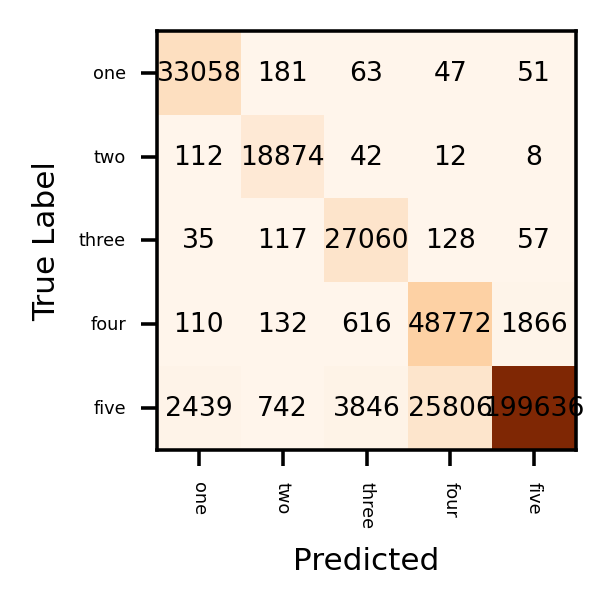

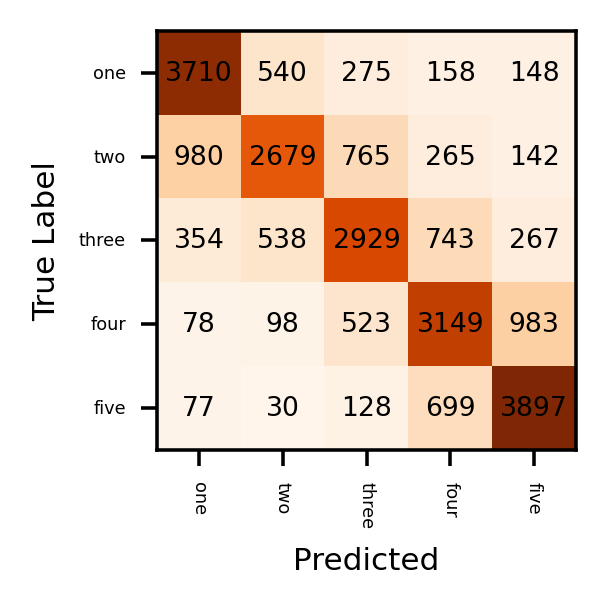

In [0]:
from sklearn.metrics import f1_score
# init net
vocab_length = len(vocab.vectors)
embedding_dim = vocab.vectors.shape[1]
hidden_size = 256
net = ReviewClassifier('bilstm', 5, hidden_size, vocab_length, embedding_dim, vocab)
net.to(device)

# load param
net.load_state_dict(torch.load("/content/drive/My Drive/cis522/HW4/model/{}_model_cb.pkl".format('bilstm')))

# loss
criterion = nn.CrossEntropyLoss(weight=loss_weights.float())

# prediction
train_pre, train_polar, _, _, train_f1= test_model(net, train_iter, -1) 
val_pre, val_polar, _, _, val_f1 = test_model(net, val_iter, -1) 

# f1 score
# train_f1 = f1_score(train_pre+1, train_score, average='macro')
print('train data f1 score = ', train_f1)

# val_f1 = f1_score(val_pre+1, val_score, average='macro')
print('val data f1 score = ', val_f1)

plot_confusion_matrix(train_polar, train_pre, None, ["one","two","three","four","five"], title='Confusion matrix', tensor_name = 'MyFigure/image', normalize=False)
plot_confusion_matrix(val_polar, val_pre, None, ["one","two","three","four","five"], title='Confusion matrix', tensor_name = 'MyFigure/image', normalize=False)

**Submitting your solutions:** As in the previous homeworks, implement the below header that takes in a Pandas dataframe and returns the predictions of review scores for each of the Amazon reviews.

**NOTE:** Remember to set the `sort` argument of the `BucketIterator` to `False` when initializing the iterator for the test set. Also set `shuffle` to `False` and use a batch size of 1. This will make sure the generated predictions are in the same order as the test set.

In [0]:
def predict(model, test_iter):
    pre_ls = np.array([])
    polar_ls = np.array([])
    with torch.no_grad():
        for idx, batch in enumerate(test_iter):
            text, text_lengths = batch.Text

            # make prediction 
            predictions = model(text.to(device), text_lengths)

            pre = torch.argmax(predictions, dim=1)

            pre_ls = np.append(pre_ls, pre.cpu().numpy())


    return pre_ls

In [0]:
from torchtext.data import Iterator, BucketIterator
# generate test iter
test = data.TabularDataset(
        path=repo_path, format='csv',
        fields=[("Unnamed: 0", None), 
            ("Summary", None), ("Text", TEXT)], skip_header=True)
test_iter = BucketIterator(
            test,
            batch_size=1,
            device="cuda:0",
            # sort_key=lambda x: len(x.Text), 
            sort_within_batch=False,
            shuffle = False,
            )

In [0]:
# Inputs: The input to this function is the path to the input CSV file
# Outputs: Return a **numpy** array with your score predictions. 
# **Note** that these score predictions should be between *1-5*.
from torchtext import data, datasets
def generate_rnn_predictions(input):
    # TODO: Write your code here
    
    vocab_length = len(vocab.vectors)
    embedding_dim = vocab.vectors.shape[1]
    hidden_size = 256
    net = ReviewClassifier('rnn', 5, hidden_size, vocab_length, embedding_dim, vocab)
    net.to(device)

    # load param
    net.load_state_dict(torch.load("/content/drive/My Drive/cis522/HW4/model/{}_model_cb.pkl".format('rnn')))

    # prediction
    train_pre= predict(net, test_iter)+1

    return train_pre

def generate_gru_predictions(input_df):
  # TODO: Write your code here
    vocab_length = len(vocab.vectors)
    embedding_dim = vocab.vectors.shape[1]
    hidden_size = 256
    net = ReviewClassifier('gru', 5, hidden_size, vocab_length, embedding_dim, vocab)
    net.to(device)

    # load param
    net.load_state_dict(torch.load("/content/drive/My Drive/cis522/HW4/model/{}_model_cb.pkl".format('gru')))

    # prediction
    train_pre= predict(net, test_iter)+1

    return train_pre

def generate_lstm_predictions(input_df):
  # TODO: Write your code here
    vocab_length = len(vocab.vectors)
    embedding_dim = vocab.vectors.shape[1]
    hidden_size = 256
    net = ReviewClassifier('lstm', 5, hidden_size, vocab_length, embedding_dim, vocab)
    net.to(device)

    # load param
    net.load_state_dict(torch.load("/content/drive/My Drive/cis522/HW4/model/{}_model_cb.pkl".format('lstm')))

    # prediction
    train_pre= predict(net, test_iter)+1

    return train_pre

def generate_bilstm_predictions(input_df):
  # TODO: Write your code here
    vocab_length = len(vocab.vectors)
    embedding_dim = vocab.vectors.shape[1]
    hidden_size = 256
    net = ReviewClassifier('bilstm', 5, hidden_size, vocab_length, embedding_dim, vocab)
    net.to(device)

    # load param
    net.load_state_dict(torch.load("/content/drive/My Drive/cis522/HW4/model/{}_model_cb.pkl".format('bilstm')))

    # prediction
    train_pre= predict(net, test_iter)+1

    return train_pre

In [0]:
test_case_3e_rnn    = generate_test_predictions(generate_rnn_predictions)        # 1 pts  
test_case_3e_gru    = generate_test_predictions(generate_gru_predictions)        # 2 pts
test_case_3e_lstm   = generate_test_predictions(generate_lstm_predictions)       # 3 pts
test_case_3e_bilstm = generate_test_predictions(generate_bilstm_predictions)     # 3 pts

In [0]:
print(test_case_3e_rnn)
print(test_case_3e_gru)
print(test_case_3e_lstm)
print(test_case_3e_bilstm)

[4. 4. 1. ... 5. 5. 3.]
[1. 4. 1. ... 5. 5. 3.]
[5. 4. 2. ... 5. 5. 3.]
[5. 4. 2. ... 5. 5. 3.]


# Q4. Classifier with self-attention (30 pts)

Now, we will implement the Review Classifier with self-attention. Self-attention is a technique where we score the input sequence hidden states with respect to the final hidden representation we use for classification. 

Attention is a very useful technique used in all of deep learning to figure out what parts of the input are more important for producing the output. This helps us use a more relevant feature representation of the input with respect to the end goal. In NLP applications, we typically want to know which words (or tokens) in the input sequence are important for our task. In this assignment, we are interested to figure out what words in the review text are the most important to predict the rating. We call it self-attention because the words from the same input sentence are attended on for the classification.

You can read about attention in more detail from [here](https://medium.com/datadriveninvestor/attention-in-rnns-321fbcd64f05).

Attention was originally introduced for encoder-decoder architectures used for machine translation in [this paper](https://arxiv.org/pdf/1409.0473.pdf).



## Tensorboard setup

In [0]:
%load_ext tensorboard

In [0]:
import torch
ROOT_LOG_DIR = "/content/drive/My Drive/UPenn_Class/CIS 522/hw/hw4/logs"

## Init dataset

In [0]:
# TODO: INSERT CODE HERE
import spacy
import torch
from torchtext import data, datasets
spacy_en = spacy.load('en_core_web_sm')

def tokenizer(text): # create a tokenizer function
    return [tok.text for tok in spacy_en.tokenizer(text)]

# TEXT = data.Field(sequential=True, tokenize=tokenizer, lower=True, fix_length=150, include_lengths=True)
# SCORE = data.Field(sequential=False, use_vocab=False)

TEXT = data.Field(sequential=True, tokenize=tokenizer, lower=True, include_lengths=True)
SCORE = data.Field(sequential=False, use_vocab=False)

In [0]:
# TODO: INSERT CODE HERE
train, val = data.TabularDataset.splits(
        path='/content/drive/My Drive/UPenn_Class/CIS 522/hw/hw4/dataset', train='train.csv',
        validation='val.csv', format='csv',
        fields=[("Unnamed: 0", None),("Id", None), ("ProductId", None), ("UserId", None),
            ("ProfileName", None), ("HelpfulnessNumerator", None),
            ("HelpfulnessDenominator", None), ("Score", SCORE),
            ("Time", None), ("Summary", None), ("Text", TEXT)], skip_header=True)

In [0]:
# TODO: INSERT CODE HERE
print(val[9].__dict__.keys())
for i in range(5):
    print("train text:", train[i].Text)
    print("train Score:", train[i].Score)

In [0]:
TEXT.build_vocab(train, vectors="glove.6B.300d", max_size=10000)
vocab = TEXT.vocab
print(vocab.vectors.shape)  #[10002, 300]

In [0]:
# TODO: INSERT CODE HERE
from torchtext.data import Iterator, BucketIterator

train_iter, val_iter = BucketIterator.splits(
                (train, val), 
                batch_sizes=(32, 32),
                device="cuda:0",
                sort_key=lambda x: len(x.Text), 
                sort_within_batch=True,
                repeat=False, # we pass repeat=False because we want to wrap this Iterator layer.
                shuffle = True,
            )
print('LEN TRAIN', len(train_iter))  #11370
print('LEN VAL', len(val_iter))  #755

In [0]:
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# TODO: INSERT CODE HERE
# compute loss weights
data = [float(x) for x in train_df['Score'].value_counts().sort_index()]
percent = data/(train_df['Score'].count())

loss_weights = np.array(data)
loss_weights = torch.from_numpy(loss_weights.max()/loss_weights).to(device)
print(loss_weights)

def func(pct):
    return "{:.1f}%".format(pct)

train_df['Score'].value_counts().plot.pie(autopct=lambda pct: func(pct))
plt.figure()
val_df['Score'].value_counts().plot.pie(autopct=lambda pct: func(pct))

## Q4a. Define the attention module

Define an `Attention` module (just like you define any model). For this assignment, we will be implementing *additive attention*. So, the inputs to the attention will be passed through fully connected layers and finally through a softmax to output the `attention_scores`. The following figure summarizes the procedure to compute the `attention_scores`. Implement the `forward()` of the `Attention` module as per the figure.

![attention](https://i.imgur.com/uFdThV6.png)

To implement self-attention we will first define an `Attention` module. This module will take as input the final representation with respect to which we want to attend on the input sequence (for this assignment, the last hidden state) and the output of the recurrent layer from each timestep and outputs `attention_scores` which is a probability distribution over each token in the input sequence representing the importance of each token for the final prediction.

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Attention(nn.Module):
  def __init__(self, hidden_size, mode):
    super(Attention, self).__init__()

    self.mode = mode

    if self.mode == 'bilstm':
        self.fc = nn.Sequential(
            nn.Linear(4*hidden_size,2*hidden_size),
            # nn.ReLU(inplace=True),
            # nn.Linear(32,1),
            nn.Softmax(dim=0),
        )
    else:
        self.fc = nn.Sequential(
            nn.Linear(2*hidden_size,hidden_size),
            # nn.ReLU(inplace=True),
            # nn.Linear(32,1),
            nn.Softmax(dim=0),
        )

  def forward(self, hidden, encoder_outputs):
    """ 
    Parameters: 
    hidden (vector): Final hidden state from the input sequence [n_layer, b, hidden_dim]
    encoder_outputs (tensor): Hidden state produced from each of the input sequence tokens [seq_len, b, hidden_dim]
    """
    h = encoder_outputs
    len_seq = int(h.shape[0])
    bcsz = h.shape[1]
    s = hidden

    if self.mode == 'bilstm':
        s = torch.cat((s[-1],s[-2]), -1)
    else:
        s = s[-1]  #[b, hidden_dim]
    
    s = torch.stack(len_seq*[s])

    alpha = self.fc(torch.cat((s,h), -1))  #[len, b, hidden_dim]

    return alpha

## Q4b. Define the classifier model with attention

Now, define a model which uses the `Attention` module defines above. This model will be the same as the one defined in section Q3 except that you will compute a `context` vector (calculated as a weighted average of the outputs for each timestep with weights from the `Attention` module) and then concatenate this vector with the last hidden state vector . The context vector concatenated with the last hidden state should be passed through one (or more) fully connected layers to generate the final predictions.

**NOTE:** Pay careful attention to the dimensions of the output. The recurrent layers expect input with the batch size at the second dimension and sequence length as the first dimension. The output also follows the same rule.

**NOTE:** Also we recommend you use `nn.utils.rnn.pad_packed_sequence` before passing the input to the recurrent layers. This will make sure the padding is ignored for every sample in a batch and the output will be from the last batch 

In [0]:
class ReviewClassifierWithAttention(nn.Module):
    def __init__(self, mode, output_size, hidden_size, vocab_size, embedding_length, word_embeddings):
        super(ReviewClassifierWithAttention, self).__init__()
        """ 
        mode (string): Type of recurrent layer being used. Types are ['rnn', 'lstm', 'gru', 'bilstm']
        output_size (int): Size of the last layer for classification (hint: how many classes do you have?)
        hidden_size (int): Length of your hidden state vector
        vocab_size (int): Length of your vocab (can get this by doing len(TEXT.vocab))
        embedding_length (int): Dimension of your word embedding vector (hint: look at part 2c)
        word_embeddings (Tensor): All of the word embeddings generated. Can get this from TEXT.vocab.vectors
        """

        if mode not in ['rnn', 'lstm', 'gru', 'bilstm']:
            raise ValueError("Choose a mode from - rnn / lstm / gru / bilstm")

        # Defining some parameters
        self.mode = mode
        self.n_layers = 2
        self.output_size = output_size
        self.hidden_size = hidden_size   
        self.embedding_length = embedding_length
        self.embedding = nn.Embedding(vocab_size, embedding_length)

        self.attention = Attention(self.hidden_size, self.mode)

        #Defining the layers
        if self.mode == 'rnn':  #64
            self.net = nn.RNN(embedding_length, hidden_size, self.n_layers, batch_first=False)
        elif self.mode == 'lstm':
            self.net = nn.LSTM(embedding_length, hidden_size, self.n_layers)
        elif self.mode == 'gru':
            self.net = nn.GRU(embedding_length, hidden_size, self.n_layers, batch_first=False)
        elif self.mode == 'bilstm':
            self.net = nn.LSTM(embedding_length, hidden_size, self.n_layers, batch_first=False, bidirectional=True)
        else:
            self.net = nn.RNN(embedding_length, hidden_size, self.n_layers, batch_first=False)

        # Fully connected layer
        if self.mode == 'bilstm':
            self.fc = nn.Sequential(
                nn.Linear(4*hidden_size, 200),
                nn.Tanh(),
                nn.Linear(200, 100),
                nn.Tanh(),
                nn.Linear(100, output_size),
                # nn.Sigmoid(),
                )
        else:
            self.fc = nn.Sequential(
                nn.Linear(2*hidden_size, 200),
                nn.Tanh(),
                nn.Linear(200, 100),
                nn.Tanh(),
                nn.Linear(100, output_size),
                # nn.Sigmoid(),
                )

            
    def init_hid(self, input):
        batch_size = input
        # print('b', batch_size)
        hidden_init = torch.zeros(self.n_layers, batch_size, self.hidden_size).to(device)
        return hidden_init

    def forward(self, text, text_lengths):
        # TODO
        embeds = self.embedding(text)
        embeds = nn.utils.rnn.pack_padded_sequence(embeds, text_lengths)
        # init hidden state
        # length = text_lengths.shape[0]
        # self.hidden = self.init_hid(length)

        # Passing in the input and hidden state into the model and obtaining outputs
        if self.mode == 'lstm':
            out, (hT, cell) = self.net(embeds)
            hTN = hT[-1]
        elif self.mode == 'bilstm':
            out, (hT, cell) = self.net(embeds)
            hTN = torch.cat((hT[-1],hT[-2]), -1)  #[b,2*hidden_dim]
        else:
            out, hT = self.net(embeds)
            hTN = hT[-1]  #[b,hidden_dim]

        out, _ = nn.utils.rnn.pad_packed_sequence(out)

        # self attention
        score = self.attention(hT, out)
        context = score*out  #[len,b,hidden_dim]
        context = torch.sum(context, 0)  #[b,hidden_dim]

        # Reshaping the outputs such that it can be fit into the fully connected layer
        input_fc = torch.cat((context,hTN), -1)
        out = self.fc(input_fc)

        return out

## Q4c. Training the attention model

Train the model defined above using the recurrent layer which performed the best in the previous section. (You can choose to tune the hyperparameters - recurrent layers, hidden size, etc. also to pick the best model with self attention). 

**Q4c (5 pts):** Report the final accuracy, F1 score and loss for the training and validation sets. Include the training and validation plots in your write-up. Also plot the confusion matrix for the validation data and include it in your write-up.

**Q4d (5 pts):** How does the model with and without self attention compare? What do you think intuitively explains the difference in performance?

In [0]:
import os
from torch.utils.tensorboard import SummaryWriter
Q4_DIR = "q4_v2" # Sub-Directory for storing this specific experiment's logs
logger = SummaryWriter(os.path.join(ROOT_LOG_DIR, Q4_DIR))
# step avg
DATA_NAME_LOSS = "q4_LOSS"
DATA_NAME_ACC = "q4_ACC"
DATA_NAME_F1 = "q4_F1"

# epoch avg
DATA_NAME_LOSS_VALE = "Q4_LOSS_VAL"
DATA_NAME_ACC_VALE = "Q4_ACC_VAL"
DATA_NAME_F1_VALE = "Q4_F1_VAL"

In [0]:
%tensorboard --logdir {ROOT_LOG_DIR.replace(" ", "\\ ")}

In [0]:
# TODO: INSERT CODE HERE
from sklearn.metrics import f1_score
# initiate parameters
epoch_loss = 0
num_sample = 0

vocab_length = len(vocab.vectors)
embedding_dim = vocab.vectors.shape[1]

# initiate hyper-parameters
lr = 1e-4
EPOCH = 5  #50

# initiate model 
rnn = ReviewClassifierWithAttention('bilstm', 5, 700, vocab_length, embedding_dim, vocab)
rnn.to(device)

# initiate loss and optimizer 
criterion = nn.CrossEntropyLoss(weight=loss_weights.float())
criterion_val = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=lr)
scheduler =  torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.8, patience=4, threshold=1e-4)

# Load pretrained word vector
pretrain_vector = vocab.vectors
rnn.embedding.weight.data.copy_(pretrain_vector)

# training loop
for epoch in range(EPOCH):
    running_loss = 0
    running_acc = 0
    running_f1 = 0
    rnn.train()
    for idx, batch in enumerate(train_iter):
        optimizer.zero_grad()
        text, text_lengths = batch.Text
        polarity = batch.Score-1
        # print('idx', idx)
        # print('text.shape', text.shape)

        # make prediction 
        predictions = rnn(text.to(device), text_lengths)

        # compute accuracy
        correct = torch.sum(torch.argmax(predictions, dim=1) == polarity)
        acc = (correct.float()*100. / text_lengths.shape[0])

        # loss backward
        loss = criterion(predictions, polarity)
        loss.backward()

        # f1 score
        pred = torch.argmax(predictions, dim=1)
        f1 = f1_score(polarity.cpu().numpy(), pred.cpu().numpy(), average='macro')

        # visualize loss and acc, f1
        running_loss += loss.item()
        running_acc += acc
        running_f1 += f1

        optimizer.step()

        if (idx)%int(len(train_iter)/20)==0:
            print('[epoch=%d/%d, step=%5d/%d] loss: %.3f || acc: %.3f || f1: %.3f || avg_loss: %.3f || avg_acc: %.3f|| avg_f1: %.3f' % (epoch+1, EPOCH, idx+1, len(train_iter), loss, acc, f1, running_loss/(idx+1), running_acc/(idx+1), running_f1/(idx+1)))
            print("========================================================")
        if ((idx)%int(len(train_iter)/20)==0) and (idx!=0):
            logger.add_scalar(DATA_NAME_LOSS, running_loss/(idx+1), epoch*len(train_iter)+idx+1)  # tensorboard logger
            logger.add_scalar(DATA_NAME_ACC, running_acc/(idx+1), epoch*len(train_iter)+idx+1)  # tensorboard logger
            logger.add_scalar(DATA_NAME_F1, running_f1/(idx+1), epoch*len(train_iter)+idx+1)  # tensorboard logger

    if scheduler != None:
        # print('STEP SCHEDULER')
        scheduler.step(running_loss)
    print("-----------------------------------------------------------------------------")
    print('<epoch=%d/%d> loss: %.3f || acc: %.3f || f1: %.3f' % (epoch+1, EPOCH, running_loss / (idx+1), running_acc/(idx+1), running_f1/(idx+1)))
    print("-----------------------------------------------------------------------------")

    logger.add_scalar(DATA_NAME_LOSS, running_loss/(idx+1), epoch*len(train_iter)+idx+1)  # tensorboard logger
    logger.add_scalar(DATA_NAME_ACC, running_acc/(idx+1), epoch*len(train_iter)+idx+1)  # tensorboard logger
    logger.add_scalar(DATA_NAME_F1, running_f1/(idx+1), epoch*len(train_iter)+idx+1)  # tensorboard logger

    # validation test
    with torch.no_grad():
        running_loss_val = 0
        running_acc_val = 0
        running_f1_val = 0
        rnn.eval()
        for idx, batch in enumerate(val_iter):
            # optimizer.zero_grad()
            text, text_lengths = batch.Text
            polarity = batch.Score-1

            # make prediction 
            predictions = rnn(text.to(device), text_lengths)

            correct = torch.sum(torch.argmax(predictions, dim=1) == polarity)
            acc = (correct.float()*100. / text_lengths.shape[0])

            # loss backward
            loss = criterion_val(predictions, polarity)
            # loss.backward()

            # f1 score
            pred = torch.argmax(predictions, dim=1)
            f1 = f1_score(polarity.cpu().numpy(), pred.cpu().numpy(), average='macro')

            # visualize loss and acc, f1
            running_loss_val += loss.item()
            running_acc_val += acc
            running_f1_val += f1

            # optimizer.step()

            if (idx)%int(len(val_iter)/5)==0:
                print('VAL[step=%5d/%d] loss: %.3f || acc: %.3f || f1: %.3f || avg_loss: %.3f || avg_acc: %.3f|| avg_f1: %.3f' % (idx+1, len(val_iter), loss, acc, f1, running_loss_val/(idx+1), running_acc_val/(idx+1), running_f1_val/(idx+1)))
                print("========================================================")

        print("-----------------------------------------------------------------------------")
        print('<ALL VAL> loss: %.3f || acc: %.3f, || f1: %.3f' % (running_loss_val/(idx+1), running_acc_val/(idx+1), running_f1_val/(idx+1)))
        print("-----------------------------------------------------------------------------")
        logger.add_scalar(DATA_NAME_LOSS_VALE, running_loss_val/(idx+1), epoch*len(val_iter)+idx+1)  # tensorboard logger
        logger.add_scalar(DATA_NAME_ACC_VALE, running_acc_val/(idx+1), epoch*len(val_iter)+idx+1)  # tensorboard logger
        logger.add_scalar(DATA_NAME_F1_VALE, running_f1_val/(idx+1), epoch*len(val_iter)+idx+1)  # tensorboard logger
        print('************************************************************************************************************')

### Save attention model

In [0]:
PATH_RNN = '/content/drive/My Drive/UPenn_Class/CIS 522/hw/hw4/models/q4_bilstm.pkl'
torch.save(rnn.state_dict(), PATH_RNN)
print('model saved!')

### Load model and evaluate

In [0]:
def test_model(model, test_iter, criterion):
    pre_ls = np.array([])
    score_ls = np.array([])
    with torch.no_grad():
        # for i in range(EPOCH):
        running_acc = 0
        running_loss = 0
        for idx, batch in enumerate(test_iter):
            text, text_lengths = batch.Text
            # print(text_lengths.shape[0])
            # print(embedding_dim)
            polarity = batch.Score-1

            # make prediction 
            predictions = model(text.to(device), text_lengths)
            # print(predictions)

            loss = criterion(predictions, polarity.long())

            # running_loss += loss.item()
            pre = torch.argmax(predictions, dim=1)
            correct = torch.sum(pre == polarity)
            pre_ls = np.append(pre_ls, pre.cpu().numpy())
            score_ls = np.append(score_ls, polarity.cpu().numpy())
            # print(correct)
            acc = (correct.float()*100. / text_lengths.shape[0]) 

            running_loss += loss.item()
            running_acc += acc

            # optimizer.zero_grad()
      
    print('********************************************************')
    avg_loss = running_loss/(idx+1)
    avg_acc = running_acc/(idx+1)
    print('loss: %.3f acc: %.3f' % (avg_loss, avg_acc))
    print("********************************************************")

    return pre_ls, score_ls, avg_loss, avg_acc

model loaded!
********************************************************
loss: 0.109 acc: 96.017
********************************************************
********************************************************
loss: 1.796 acc: 70.816
********************************************************
train data f1 score =  0.9597606064571972
val data f1 score =  0.7064253569336667


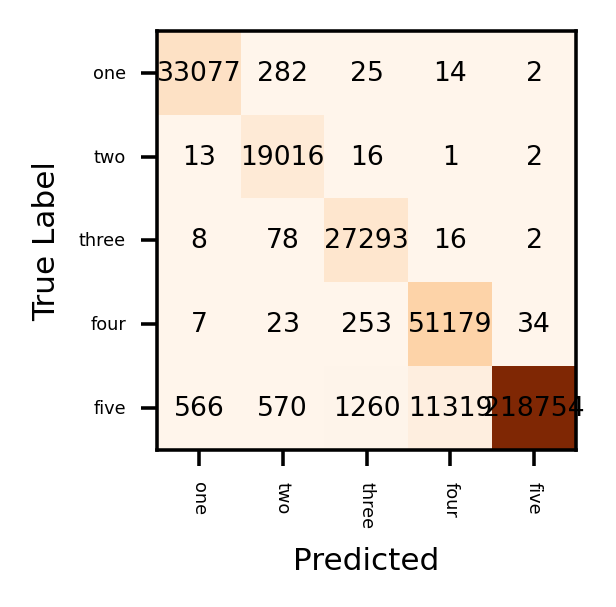

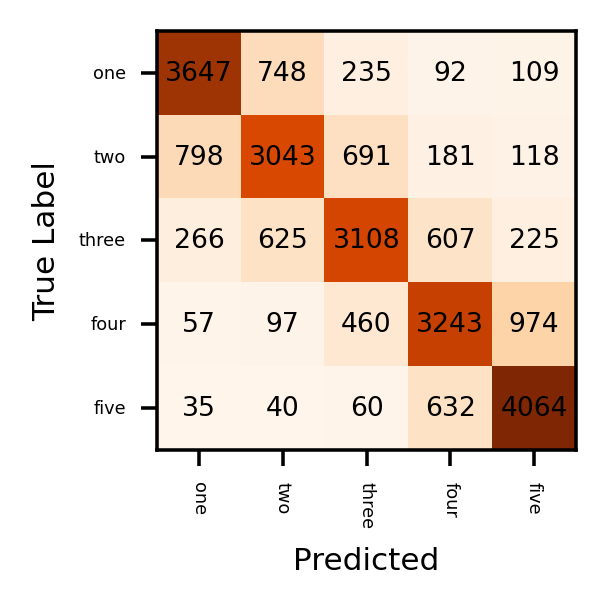

In [0]:
import numpy as np
from sklearn.metrics import f1_score

vocab_length = len(vocab.vectors)
embedding_dim = vocab.vectors.shape[1]

# init net
net = ReviewClassifierWithAttention('bilstm', 5, 700, vocab_length, embedding_dim, vocab)
net.to(device)

# load param
PATH_RNN = '/content/drive/My Drive/UPenn_Class/CIS 522/hw/hw4/models/q4_bilstm.pkl'
net.load_state_dict(torch.load(PATH_RNN))
net.eval()
print('model loaded!')

# loss
criterion = nn.CrossEntropyLoss()

# prediction
train_pre, train_score, _, _ = test_model(net, train_iter, criterion) 
val_pre, val_score, _, _ = test_model(net, val_iter, criterion) 

# f1 score
# train_f1 = f1_score(train_pre+1, train_score, average='macro')
train_f1 = f1_score(train_score, train_pre, average='macro')
print('train data f1 score = ', train_f1)

# val_f1 = f1_score(val_pre+1, val_score, average='macro')
val_f1 = f1_score(val_score, val_pre, average='macro')
print('val data f1 score = ', val_f1)

plot_confusion_matrix(train_score, train_pre, None, ["one","two","three","four","five"], title='Confusion matrix', tensor_name = 'MyFigure/image', normalize=False)
plot_confusion_matrix(val_score, val_pre, None, ["one","two","three","four","five"], title='Confusion matrix', tensor_name = 'MyFigure/image', normalize=False)

## Predict on test set

**Submitting your solutions:** As in the previous homeworks, implement the below header that takes in a Pandas dataframe and returns the predictions of review scores for each of the Amazon reviews.

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def predict(model, test_iter):
    pre_ls = np.array([])
    polar_ls = np.array([])
    with torch.no_grad():
        for idx, batch in enumerate(test_iter):
            text, text_lengths = batch.Text

            # make prediction 
            predictions = model(text.to(device), text_lengths)

            pre = torch.argmax(predictions, dim=1)

            pre_ls = np.append(pre_ls, pre.cpu().numpy())


    return pre_ls

In [0]:
from torchtext.data import Iterator, BucketIterator, TabularDataset
# generate test iter
test = TabularDataset(
        path=repo_path, format='csv',
        fields=[("Unnamed: 0", None), 
            ("Summary", None), ("Text", TEXT)], skip_header=True)
test_iter = BucketIterator(
            test,
            batch_size=1,
            device="cuda:0",
            # sort_key=lambda x: len(x.Text), 
            sort_within_batch=False,
            shuffle = False,
            )

In [0]:
# Inputs: The input to this function is a pandas dataframe
# Outputs: Return a **numpy** array with your score predictions. 
# **Note** that these score predictions should be between *1-5*.

def generate_attention_predictions(input_df):
    # TODO: Write your code here
    vocab_length = len(vocab.vectors)
    embedding_dim = vocab.vectors.shape[1]

    # init net
    net = ReviewClassifierWithAttention('bilstm', 5, 700, vocab_length, embedding_dim, vocab)
    net.to(device)

    # load param
    PATH_RNN = '/content/drive/My Drive/UPenn_Class/CIS 522/hw/hw4/models/q4_bilstm.pkl'
    net.load_state_dict(torch.load(PATH_RNN))
    net.eval()

    # prediction
    train_pre= predict(net, test_iter)+1
    return train_pre

In [0]:
test_case_4e = generate_test_predictions(generate_attention_predictions)         # 20 pts  

# Q5. Transfer Learning using Hugging Face (20 pts)

As you saw in the computer vision homework, transfer learning is a powerful tool to boost the accuracy of a model, especially with limited data. Most transfer learning models for text applications are extremely large and difficult to work with, so to make this easier most use a github repository called [Hugging Face](https://github.com/huggingface) (which we highly recommend checking out!). Getting the data to be in the right format for training can be difficult even with Hugging Face, so for this assignment we'll be using a library built on top of Hugging Face called [Simple Transformers](https://github.com/ThilinaRajapakse/simpletransformers), which makes transfer learning extremely easy.

## Setting up Simple Transformers

First we download the pip package for SimpleTransformers

In [0]:
!pip install simpletransformers

     |████████████████████████████████| 153kB 1.4MB/s 
     |████████████████████████████████| 204kB 35.0MB/s 
     |████████████████████████████████| 542kB 43.3MB/s 
     |████████████████████████████████| 3.7MB 40.6MB/s 
     |████████████████████████████████| 1.0MB 40.0MB/s 
     |████████████████████████████████| 870kB 25.1MB/s 
  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7424 sha256=0fe0cf9ba5529b684c59a01fb107ae07aa6ee5fb35ce87fb24d65488a174df2d
  Stored in directory: /root/.cache/pip/wheels/4f/32/0a/df3b340a82583566975377d65e724895b3fad101a3fb729f68
  Created wheel for sacremoses: filename=sacremoses-0.0.38-cp36-none-any.whl size=884628 sha256=cd95d4df82c5990f35f92e3e49bbaf0b73a3655788046761ac9ea1bb289969b0
  Stored in directory: /root/.cache/pip/wheels/6d/ec/1a/21b8912e35e02741306f35f66c785f3afe94de754a0eaf1422
Successfully built seqeval sacremoses


## 1st net

Now, to initialize a classification model, you can do so similarly to how we do it below. Feel free to change the args passed in, however, make sure to keep "fp16" set to false (trust us on this).

In [0]:
from simpletransformers.classification import ClassificationModel
model = ClassificationModel('roberta', 'roberta-base', num_labels=6, args=({'fp16': False, 'reprocess_input_data': True}))

The input format for SimpleTransformers is to have the text data in a columm called "text" and to have the labels as a column called "labels" so we do that below.

Great! Now that you've downloaded the model, let's train with it. To train with it, run the following code snippet below. 

**Note:** This will take a pretty long time so grab a coffee, turn on a Netflix show and watch a few episodes, play a few games of Overwatch, whatever you do to kill time. You can actually run up to two Colab runtimes at once, so you can always duplicate this notebook and keep on working on the homework -- up to you.

You'll note that this will progress in two stages: In the first stage the model converts your input data into features (similar to when you created your TabularDataset earlier). In the second stage, it will actually train with those input features and labels, and display the progress to you. For reference, it took around ~3 hours to run through a single epoch of the dataset (yikes).

**Hint:** We recommend that you make sure this works on a subset of your training data / testing data (like 10% of it) before you run it on the whole dataset so you don't waste lots of time.

In [0]:
from sklearn.utils import shuffle
# train_df = pd.DataFrame(train_set)
# val_df = pd.DataFrame(val_set)

train_df_xy = train_df[['Text', 'Score']].rename(columns={'Text': 'text', 'Score': 'labels'})
val_df_xy = val_df[['Text', 'Score']].rename(columns={'Text': 'text', 'Score': 'labels'})

len_train_df = len(train_df_xy)
len_val_df = len(val_df_xy)

train_df_cleaned = train_df_xy
# train_df_cleaned = train_df_cleaned[:int(len_train_df/10)]
test_df_cleaned = val_df_xy
# test_df_cleaned = test_df_cleaned[:int(len_val_df/10)]
train_df_cleaned = shuffle(train_df_cleaned)
test_df_cleaned = shuffle(test_df_cleaned)

# Train the model
model.train_model(train_df_cleaned)

# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(test_df_cleaned)

Running loss: 1.767059

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.127218



**Q5a (8 pts):** Report your final testing macro average F1 Score as well as confusion matrix in your writeup. Analyze your results in comparison to the recurrent models you  trained previously (including both the self-attention and non self-attention models). Try out at least 2 different models (roberta included) and compare their efficacies in the writeup.


val data f1 score =  0.6103316750922799


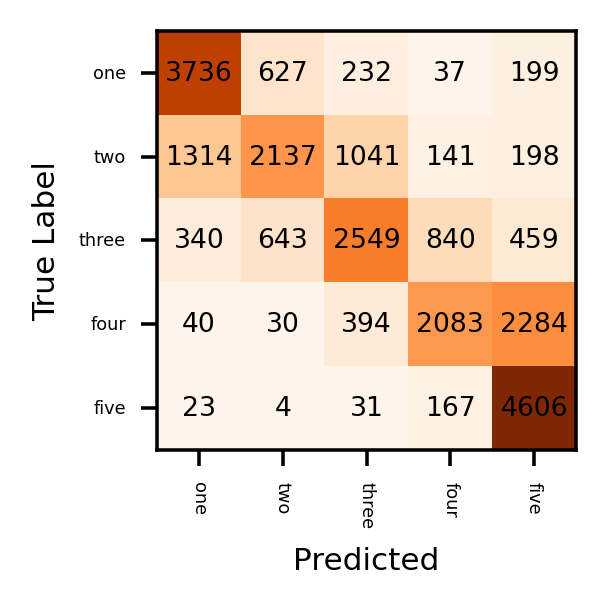

In [0]:
import numpy as np
from sklearn.metrics import f1_score

# f1 score
val_score = test_df_cleaned.labels
val_pre = model_outputs.argmax(1)
val_f1 = f1_score(val_score, val_pre, average='macro')
print('val data f1 score = ', val_f1)

plot_confusion_matrix(val_score, val_pre, None, ["one","two","three","four","five"], title='Confusion matrix', tensor_name = 'MyFigure/image', normalize=False)

## 2nd net

In [0]:
from simpletransformers.classification import ClassificationModel
model2 = ClassificationModel('bert', 'bert-base-uncased', num_labels=6, args=({'fp16': False, 'reprocess_input_data': True}))

In [0]:
from sklearn.utils import shuffle
# train_df = pd.DataFrame(train_set)
# val_df = pd.DataFrame(val_set)

train_df_xy = train_df[['Text', 'Score']].rename(columns={'Text': 'text', 'Score': 'labels'})
val_df_xy = val_df[['Text', 'Score']].rename(columns={'Text': 'text', 'Score': 'labels'})

len_train_df = len(train_df_xy)
len_val_df = len(val_df_xy)

train_df_cleaned = train_df_xy.sample(frac=1).reset_index(drop=True)
# train_df_cleaned = train_df_cleaned[:int(len_train_df/10)]
test_df_cleaned = val_df_xy
# test_df_cleaned = test_df_cleaned[:int(len_val_df/10)]
train_df_cleaned = shuffle(train_df_cleaned)
test_df_cleaned = shuffle(test_df_cleaned)

# Train the model
model2.train_model(train_df_cleaned)

# Evaluate the model
result, model_outputs, wrong_predictions = model2.eval_model(test_df_cleaned)

Running loss: 1.895414

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.505747



val data f1 score =  0.6010492971906911


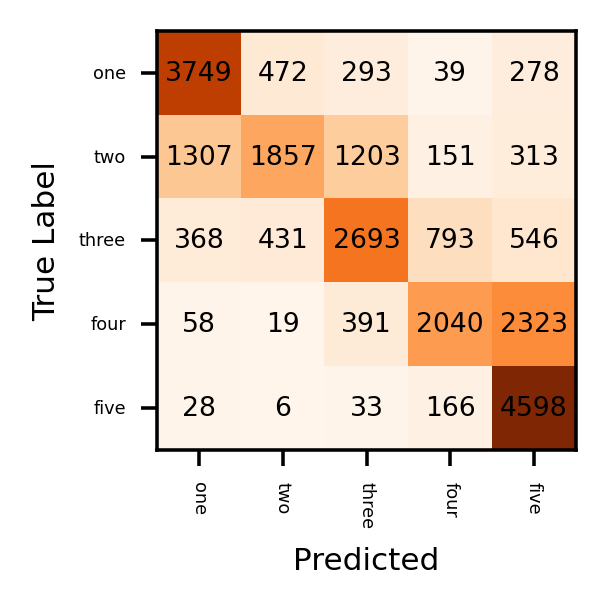

In [0]:
import numpy as np
from sklearn.metrics import f1_score

# f1 score
val_score = test_df_cleaned.labels
val_pre = model_outputs.argmax(1)
val_f1 = f1_score(val_score, val_pre, average='macro')
print('val data f1 score = ', val_f1)

plot_confusion_matrix(val_score, val_pre, None, ["one","two","three","four","five"], title='Confusion matrix', tensor_name = 'MyFigure/image', normalize=False)

## Submit transfer learning net test result

**Submitting your solutions:** As in the previous homeworks, implement the below header that takes in a Pandas dataframe and returns the predictions of review scores for each of the Amazon reviews.

In [0]:
# Inputs: The input to this function is a pandas dataframe
# Outputs: Return a **numpy** array with your score predictions. 
# **Note** that these score predictions should be between *1-5*.

def generate_transfer_learning_predictions(input_df):
  # TODO: Write your code here
  print('input_df', input_df.keys())
  input_df_xy = input_df[['Text']].rename(columns={'Text': 'text'})
  print('input_df_xy ALL', input_df_xy)
  print('input_df_xy TEXT', input_df_xy['text'])
  print('input_df_xy TEXT LEN', len(input_df_xy['text']))
  result_test, model_outputs_test = model3.predict(input_df_xy['text'])
  print('result_test SHAPE', result_test.shape)
  print('result_test', result_test)
  print('model_outputs_test SHAPE', model_outputs_test.shape)
  print('model_outputs_test', model_outputs_test)
  return result_test

In [0]:
test_case_5b = generate_test_predictions(generate_transfer_learning_predictions) # 12 pts

input_df Index(['Unnamed: 0', 'Summary', 'Text'], dtype='object')
input_df_xy ALL                                                     text
0      When you have to eat sugar-free foods for heal...
1      This coffee is very smooth and has a great fla...
2      I ordered this coffee to taste it. It leaves a...
3      I didn't plan on writing a review for this pro...
4      This is a very innovative idea no cup just the...
...                                                  ...
29445  I received a package with 93 tea bags instead ...
29446  We ordered the salt and pepper version since t...
29447  These are DELICIOUS! They aren't health food. ...
29448  These are a huge hit at our house! Easy for bo...
29449  This is a super easy puzzle it took my standar...

[29450 rows x 1 columns]
input_df_xy TEXT 0        When you have to eat sugar-free foods for heal...
1        This coffee is very smooth and has a great fla...
2        I ordered this coffee to taste it. It leaves a...
3        I did


result_test SHAPE (29450,)
result_test [5 4 2 ... 5 5 4]
model_outputs_test SHAPE (29450, 6)
model_outputs_test [[-17.01  -2.35  -2.39  -0.42   2.57   4.56]
 [-11.44  -3.24  -1.69   1.52   4.13   2.17]
 [ -9.65   2.36   2.87   0.66  -2.65  -3.03]
 ...
 [-13.82  -2.92  -2.96  -0.62   3.1    5.19]
 [ -7.1   -2.41  -3.27  -1.78   2.21   6.11]
 [-11.31  -3.32  -1.92   1.28   4.14   2.65]]


# **Extra Credit:** Q6. Seq2Seq model (25 pts)

**Note:** The entirety of question 6 is **Extra Credit**. This will be a bit more challenging, especially to get good results, but if you have time we highly recommend trying it out!

In this section, you will implement a Seq2Seq architecture to generate the summary for the Review text. The dataset contains one more attribute which is the summary of the review text (it is actually the title reviewers gave while writing the review and the review text is the description provided).

You will implement the standard *Encoder-Decoder* model where the review text will be given as input to the encoder and the decoder will generate the summary. For simplicity of this assignment, we will implement a basic version of the encoder-decoder architecture and use standard training techniques. More sophisticated versions of the architeture like encoder-decoder attention, teacher-forcing (while training), beam search (for inference), etc. will help the model perform better. But for the purpose of this assignment, we will expect you to implement a basic version of the architecture.



## Q6a. Featuring the dataset using torchtext (for the generative task) (0 pts)

For the text generation task, you will need to redefine the torchtext data fields. Create one torchtext field. Note that, we now need to add start and end tokens to both the text sequences. Look at the `init_token` and `eos_token` parameters when creating the data field.

Then create a tabular dataset for the training and validation set. This time also load the *Summary* field. Note that to ensure we create a single common vocabulary for both - the text and summary, we will use the same data field for both the attributes.

Now build the vocabulary for the the data field you created using both the training and validation datasets created in the previous step. As before you should continue using the glove.6B.300d word embeddings.

Then just as you did in Q1, create a `BucketIterator` for both the training and validation set.

In [0]:
# TODO: INSERT CODE HERE
import spacy
import torch
from torchtext import data, datasets
spacy_en = spacy.load('en_core_web_sm')

def tokenizer(text): # create a tokenizer function
    return [tok.text for tok in spacy_en.tokenizer(text)]

TEXT = data.Field(sequential=True, tokenize=tokenizer, lower=True, include_lengths=True, init_token='<SOS>', eos_token='<EOS>')
SUMMARY = data.Field(sequential=True, tokenize=tokenizer, lower=True, include_lengths=True, init_token='<SOS>', eos_token='<EOS>')
SCORE = data.Field(sequential=False, use_vocab=False)

In [0]:
train, val = data.TabularDataset.splits(
        path='/content/drive/My Drive/UPenn_Class/CIS 522/hw/hw4/dataset', train='train.csv',
        validation='val.csv', format='csv',
        fields=[("Unnamed: 0", None),("Id", None), ("ProductId", None), ("UserId", None),
            ("ProfileName", None), ("HelpfulnessNumerator", None),
            ("HelpfulnessDenominator", None), ("Score", SCORE),
            ("Time", None), ("Summary", SUMMARY), ("Text", TEXT)], skip_header=True)

In [0]:
print(val[9].__dict__.keys())
for i in range(5):
    print("train text:", train[i].Text)
    print("train text:", train[i].Summary)
    print("train Score:", train[i].Score)

dict_keys(['Score', 'Summary', 'Text'])
train text: ['these', 'remind', 'of', 'a', 'product', 'called', 'munchos', 'that', 'i', 'liked', 'a', 'long', 'time', 'ago', 'in', 'regards', 'to', 'flavor', '.', 'great', 'crunch', 'and', 'salt', 'level', '.', 'i', 'wish', 'they', 'packages', 'a', 'bit', 'bigger', 'than', 'the', '0.8', 'and', 'smaller', 'than', '3', 'oz', '.', ' ', 'the', '0.8', 'is', 'nt', 'quite', 'enough', 'and', 'the', '3', 'is', 'too', 'much', '.', 'about', '1.5', 'oz', 'would', 'be', 'right', 'for', 'my', 'appetite', '.']
train text: ['tastes', 'great', '!']
train Score: 4
train text: ['i', 'would', "n't", 'describe', 'these', 'as', 'the', 'best', 'dried', 'cherries', 'i', 'have', 'ever', 'eaten', 'but', 'they', 'were', 'pretty', 'good.<br', '/><br', '/>traverse', 'uses', 'oil', 'with', 'the', 'cherries', 'to', 'prevent', 'caking', ',', 'a', 'little', 'to', 'much', 'in', 'my', 'opinion', '.', ' ', 'these', 'cherries', 'unlike', 'the', 'blueberries', 'i', 'bought', 'from', 

In [0]:
# build word vector
TEXT.build_vocab(train, vectors="glove.6B.300d", max_size=10000)
SUMMARY.build_vocab(train, vectors="glove.6B.300d", max_size=10000)

vocab = TEXT.vocab
vocab_summary = SUMMARY.vocab

.vector_cache/glove.6B.zip: 862MB [06:31, 2.20MB/s]                           
100%|█████████▉| 399679/400000 [00:53<00:00, 7655.18it/s]

In [0]:
len(vocab)
print('len(vocab)', len(vocab))
print('len(vocab_summary)', len(vocab_summary))
# print(vocab.freqs)
# print(vocab.itos)
# print(vocab.stoi)
print('vocab.vectors.shape', vocab.vectors.shape)
print('vocab_summary.vectors.shape', vocab_summary.vectors.shape)

len(vocab) 10004
len(vocab_summary) 10004
vocab.vectors.shape torch.Size([10004, 300])
vocab_summary.vectors.shape torch.Size([10004, 300])


In [0]:
from torchtext.data import Iterator, BucketIterator

train_iter, val_iter = BucketIterator.splits(
                (train, val), 
                batch_sizes=(64, 1),
                device="cuda:0",
                sort_key=lambda x: len(x.Text), 
                sort_within_batch=True,
                repeat=False, # we pass repeat=False because we want to wrap this Iterator layer.
                shuffle = True,
            )

## Q6a. The Encoder Model (3 pts)

You will start by defining the encoder model. This model will be exactly the same as the one implemented in section Q3. The encoder's input will be the review text and will return an encoded representation of the text (which will be the output of the recurrent layer you use). Use any one of the recurrent layers like the one which performed the best in section Q3 or tune it as a hyperparameter to choose which works the best.

**Q6a (3 pts):** Take a screenshot of your encoder architecture and attach it in your writeup. Explain your rationale for the architecture.

In [0]:
# TODO: INSERT CODE HERE
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import random

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Encoder(nn.Module):
    """ 
    mode (string): Type of recurrent layer being used. Types are ['rnn', 'lstm', 'gru', 'bilstm']
    latent_size (int): Latent size for text vector
    hidden_size (int): Hidden size for hidden state
    vocab_text_size (int): Length of text vocab
    embedding_text_size: Size of text embedding
    n_layers (int): # of layers
    device: The using device
    """
    def __init__(self, mode, latent_size, hidden_size, vocab_text_size, embedding_text_size, n_layers, device):
        super(Encoder, self).__init__()

        if mode not in ['rnn', 'lstm', 'gru', 'bilstm']:
            raise ValueError("Choose a mode from - rnn / lstm / gru / bilstm")

        # Defining some parameters
        self.n_layers = n_layers
        self.mode = mode
        self.latent_size = latent_size
        self.hidden_size = hidden_size
        self.vocab_text_size = vocab_text_size
        self.embedding_text_size = embedding_text_size
        self.device = device

        self.embedding = nn.Embedding(vocab_text_size, embedding_text_size).to(self.device)

        #Defining the layers
        if mode == 'rnn':
            self.net = nn.RNN(embedding_text_size, hidden_size, self.n_layers, batch_first=False).to(self.device)
        elif self.mode == 'lstm':
            self.net = nn.LSTM(embedding_text_size, hidden_size, self.n_layers).to(self.device)
        elif self.mode == 'gru':
            self.net = nn.GRU(embedding_text_size, hidden_size, self.n_layers, batch_first=False).to(self.device)
        elif self.mode == 'bilstm':
            self.net = nn.LSTM(embedding_text_size, hidden_size, self.n_layers, batch_first=False, bidirectional=True).to(self.device)
        else:
            self.net = nn.RNN(embedding_text_size, hidden_size, self.n_layers, batch_first=False).to(self.device)

        # Fully connected layer
        if self.mode == 'bilstm':
            self.fc = nn.Sequential(nn.Linear(2*hidden_size, 200),
                        #   nn.ReLU(),
                            nn.Tanh(),
                            nn.Linear(200, 100),
                        #   nn.ReLU(),
                            nn.Tanh(),
                            nn.Linear(100, latent_size),
                        #   nn.ReLU(),
                            nn.Tanh(),
                            ).to(self.device)
        else:
            self.fc = nn.Sequential(nn.Linear(hidden_size, 200),
                        #   nn.ReLU(),
                            nn.Tanh(),
                            nn.Linear(200, 100),
                        #   nn.ReLU(),
                            nn.Tanh(),
                            nn.Linear(100, latent_size),
                        #   nn.ReLU(),
                            nn.Tanh(),
                            ).to(self.device)

    def init_hid(self, input):
        batch_size = input
        hidden_init = torch.zeros(self.n_layers, batch_size, self.hidden_size).to(device)
        return hidden_init

    def forward(self, text, text_lengths):
        # TODO
        embeds = self.embedding(text)
        embeds = nn.utils.rnn.pack_padded_sequence(embeds, text_lengths)

        length = text_lengths.shape[0]  #bcsz
        self.hidden = self.init_hid(length)

        # Passing in the input and hidden state into the model and obtaining outputs
        if (self.mode == 'lstm') or (self.mode == 'bilstm'):
            out, (hidden, cell) = self.net(embeds)
        else:
            out, hidden = self.net(embeds)
        out, _ = nn.utils.rnn.pad_packed_sequence(out)

        # Reshaping the outputs such that it can be fit into the fully connected layer
        out = self.fc(out)

        if (self.mode == 'lstm') or (self.mode == 'bilstm'):
            return out, (hidden, cell)
        else:
            return out, hidden

## Q6b. The Decoder Model (3 pts)

Define the `decoder` model. It will be the same as the `encoder` model with the only difference being there will be an additional fully-connected layer after the output from each token in the sequence. This FC layer will have an output size equal to the vocabulary size.

**Q6b (3 pts):** Take a screenshot of your decoder architecture and attach it in your writeup. Explain your rationale for the architecture.

In [0]:
# TODO: INSERT CODE HERE
class Decoder(nn.Module):
    """ 
    mode (string): Type of recurrent layer being used. Types are ['rnn', 'lstm', 'gru', 'bilstm']
    latent_size (int): Latent size for text vector
    hidden_size (int): Hidden size for hidden state
    vocab_summary_size (int): Length of summary vocab
    n_layers (int): # of layers
    device: The using device
    """
    def __init__(self, mode, latent_size, hidden_size, vocab_summary_size, n_layers, device):
        super(Decoder, self).__init__()

        if mode not in ['rnn', 'lstm', 'gru', 'bilstm']:
            raise ValueError("Choose a mode from - rnn / lstm / gru / bilstm")

        # Defining some parameters
        self.n_layers = n_layers
        self.mode = mode
        self.latent_size = latent_size
        self.hidden_size = hidden_size
        self.vocab_summary_size = vocab_summary_size
        self.device = device

        self.embedding = nn.Embedding(vocab_summary_size, latent_size).to(self.device)  #vocab_size should be for SUMMARY

        #Defining the layers
        if mode == 'rnn':
            self.net = nn.RNN(latent_size, hidden_size, self.n_layers, batch_first=False).to(self.device)
        elif self.mode == 'lstm':
            self.net = nn.LSTM(latent_size, hidden_size, self.n_layers).to(self.device)
        elif self.mode == 'gru':
            self.net = nn.GRU(latent_size, hidden_size, self.n_layers, batch_first=False).to(self.device)
        elif self.mode == 'bilstm':
            self.net = nn.LSTM(latent_size, hidden_size, self.n_layers, batch_first=False, bidirectional=True).to(self.device)
        else:
            self.net = nn.RNN(latent_size, hidden_size, self.n_layers, batch_first=False).to(self.device)

        # Fully connected layer
        if self.mode == 'bilstm':
            self.fc = nn.Sequential(nn.Linear(2*hidden_size, 200),
                            # nn.ReLU(),
                            nn. Tanh(),
                            nn.Linear(200, 100),
                            # nn.ReLU(),
                            nn. Tanh(),
                            nn.Linear(100, vocab_summary_size),
                            ).to(self.device)
        else:
            self.fc = nn.Sequential(nn.Linear(hidden_size, 200),
                            # nn.ReLU(),
                            nn. Tanh(),
                            nn.Linear(200, 100),
                            # nn.ReLU(),
                            nn. Tanh(),
                            nn.Linear(100, vocab_summary_size),
                            ).to(self.device)

    def forward(self, out_encoder, hidden_encoder):
        # TODO
        out_encoder_embeds = self.embedding(out_encoder)  #[len, b, latent_size]

        # Passing in the input and hidden state into the model and obtaining outputs
        if (self.mode == 'lstm') or (self.mode == 'bilstm'):
            out, (hidden, cell) = self.net(out_encoder_embeds, hidden_encoder)
        else:
            out, hidden = self.net(out_encoder_embeds, hidden_encoder)

        # Reshaping the outputs such that it can be fit into the fully connected layer
        out = self.fc(out)  #[len, b, vocab_summary_size]

        if (self.mode == 'lstm') or (self.mode == 'bilstm'):
            return out, (hidden, cell)
        else:
            return out, hidden

## Q6c. The Encoder-Decoder Model (4 pts)

Now, you will define the encoder-decoder model which represents the overall architecture end-to-end. 

The encoder-decoder architeture will behave as follows,


*   Pass the review text as input through the encoder.
*   Initialize the hidden state of the decoder with the last hidden state output from the encoder.
*   The decoder will take the `<start>` token as the input in the first timestep and produce an output one timestep at a time. This means your decoder should be passed only one token at a time and output a single token. The output from the previous timestep will be fed as input in the current timestep.
*   Return the output from the decoder concatenated at each timestep.

While training, the decoder will generate outputs till the maximum summary length for that batch. This means, you will call the decoder in a for loop which runs till the length of the decoder output sequence is equal to the maximum length of the summary (true label) for that batch.

During evaluation, the decoder will produce an output till the decoder outputs the `<end>` token. The batch size has to be 1 during evaluation.

**Q6c (4 pts):** Take a screenshot of your encoder-decoder architecture and attach it in your writeup. Explain your rationale for the architecture.



In [0]:
# TODO: INSERT CODE HERE
class Seq2Seq(nn.Module):
    """ 
    mode (string): Type of recurrent layer being used. Types are ['rnn', 'lstm', 'gru', 'bilstm']
    latent_size (int): Latent size for text vector
    hidden_size (int): Hidden size for hidden state
    vocab_text_size (int): Length of text vocab
    vocab_summary_size (int): Length of summary vocab
    embedding_text_size: Size of text embedding
    encoder: The Encoder class
    decoder: The Decoder class
    device: The using device
    use_teacher (bool): Whether to use teacher force
    """
    def __init__(self, mode, latent_size, hidden_size, vocab_text_size, vocab_summary_size, embedding_text_size, encoder, decoder, device, use_teacher):
        super(Seq2Seq, self).__init__()

        # Defining some parameters
        self.n_layers = 2
        self.mode = mode
        self.latent_size = latent_size
        self.hidden_size = hidden_size
        self.vocab_text_size = vocab_text_size
        self.vocab_summary_size = vocab_summary_size
        self.embedding_text_size = embedding_text_size
        self.device = device
        self.use_teacher = use_teacher

        self.encoder = encoder(mode, latent_size, hidden_size, vocab_text_size, embedding_text_size, self.n_layers, device)  #layers num needs to be same to match hidden state shape
        self.decoder = decoder(mode, latent_size, hidden_size, vocab_summary_size, self.n_layers, device)

    def forward(self, text, summary, text_lengths, summary_lengths):
        # TODO
        # text [len, b]; summary [len, b]
        bcsz = text.shape[1]
        LEN_summary = summary.shape[0]
        max_summary_length = max(summary_lengths)
        # print('SEQ max_summary_length', max_summary_length)

        if (self.mode == 'lstm') or (self.mode == 'bilstm'):
            out_encoder, (hidden_encoder, cell_encoder) = self.encoder(text, text_lengths)
        else:
            out_encoder, hidden_encoder = self.encoder(text, text_lengths)

        output = summary[0].unsqueeze(0)  #[1,b]
        if (self.mode == 'lstm') or (self.mode == 'bilstm'):
            hidden = hidden_encoder
            cell = cell_encoder
        else:
            hidden = hidden_encoder

        outputs = torch.zeros(LEN_summary, bcsz, self.vocab_summary_size).to(self.device)
        for i in range(1, max_summary_length):
        # for i in range(1, LEN_summary):
            if (self.mode == 'lstm') or (self.mode == 'bilstm'):
                hidden_state = (hidden, cell)
                output, (hidden, cell) = self.decoder(output, hidden_state)  #output[len,b,vocab_summary_size]
            else:
                output, hidden = self.decoder(output, hidden)  #output[len,b,vocab_summary_size]

            outputs[i] = output.squeeze(0)
            if self.use_teacher:
                # print('USING TEACHER')
                teacher_force = random.random() < 0.5
            else:
                # print('NO TEACHER')
                teacher_force = False
            top1 = output.max(2)[1]
            # print('summary[i].shape', summary[i].shape)
            # print('top1', top1.shape)
            output = (summary[i].unsqueeze(0) if teacher_force else top1)

        return outputs

## Q6d. Train Seq2Seq (5 pts)

**Q6d (5 pts):** Initialize all the three models with appropriate parameters. Train the Seq2Seq model end-to-end. Use `nn.CrossEntropyLoss` for the decoder output. Report the final training loss. Plot the training loss curve and include it in your write-up.

In [0]:
import os
from torch.utils.tensorboard import SummaryWriter
Q6_DIR = "q6" # Sub-Directory for storing this specific experiment's logs
logger = SummaryWriter(os.path.join(ROOT_LOG_DIR, Q6_DIR))
DATA_NAME_LOSS = "LOSS_Q6"

In [0]:
%tensorboard --logdir {ROOT_LOG_DIR.replace(" ", "\\ ")}

In [0]:
# TODO: INSERT CODE HERE
# TODO: INSERT CODE HERE
# initiate parameters
epoch_loss = 0
num_sample = 0

vocab_length = len(vocab.vectors)
vocab_summary_length = len(vocab_summary.vectors)
embedding_text_dim = vocab.vectors.shape[1]
print('vocab_length', vocab_length)
print('vocab_summary_length', vocab_summary_length)
print('embedding_text_dim', embedding_text_dim)

# initiate hyper-parameters
lr = 1e-4
EPOCH = 10

# initiate model 
# rnn = Seq2Seq(mode, latent_size, hidden_size, vocab_text_size, vocab_summary_size, embedding_text_size, encoder, decoder, device)
rnn = Seq2Seq('bilstm', 1000, 700, vocab_length, vocab_summary_length, embedding_text_dim, Encoder, Decoder, device, True)

# initiate loss and optimizer 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=lr)
scheduler =  torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.8, patience=4, threshold=1e-4)

# Load pretrained word vector
pretrain_vector = vocab.vectors
pretrain_vector_summary = vocab_summary.vectors
print('pretrain_vector.shape', pretrain_vector.shape)  #[1004, 300]
print('pretrain_vector_summary.shape', pretrain_vector_summary.shape)  #[10004, 300]
rnn.encoder.embedding.weight.data.copy_(pretrain_vector)
# rnn.decoder.embedding.weight.data.copy_(pretrain_vector_summary)  # DON'T INIT TO DECODER EMBEDDING!!!

UNK_IDX = vocab.stoi[TEXT.unk_token]
PAD_IDX = vocab.stoi[TEXT.pad_token]

# training loop
for epoch in range(EPOCH):
    running_loss = 0
    running_acc = 0
    for idx, batch in enumerate(train_iter):
        optimizer.zero_grad()
        # print(batch)
        text, text_lengths = batch.Text
        text, text_lengths = text.to(device), text_lengths.to(device)

        summary, summary_lengths = batch.Summary  #[len, b]
        summary, summary_lengths = summary.to(device), summary_lengths.to(device)

        # polarity = batch.Score-1
        # polarity = polarity.to(device)

        # make prediction 
        predictions = rnn(text, summary, text_lengths, summary_lengths)

        predictions = predictions[1:].view(-1, predictions.shape[-1])
        summary = summary[1:].view(-1)

        # loss backward
        loss = criterion(predictions, summary)
        loss.backward()

        # visualize loss
        running_loss += loss.item()

        optimizer.step()

        if (idx)%int(len(train_iter)/20)==0:
            print('[epoch=%d/%d, step=%5d/%d] loss: %.3f || avg_loss: %.3f ' % (epoch+1, EPOCH, idx+1, len(train_iter), loss, running_loss / (idx+1)))
            logger.add_scalar(DATA_NAME_LOSS, running_loss/(idx+1), epoch*len(train_iter)+idx+1)  # tensorboard logger
            print("========================================================")

    if scheduler != None:
        scheduler.step(running_loss)
    print("-----------------------------------------------------------------------------")
    print('<epoch=%d/%d> loss: %.3f' % (epoch+1, EPOCH, running_loss / (idx+1)))
    print("-----------------------------------------------------------------------------")

vocab_length 10004
vocab_summary_length 10004
embedding_text_dim 300
pretrain_vector.shape torch.Size([10004, 300])
pretrain_vector_summary.shape torch.Size([10004, 300])
[epoch=1/10, step=    1/5685] loss: 9.209 || avg_loss: 9.209 
[epoch=1/10, step=  285/5685] loss: 3.308 || avg_loss: 4.579 
[epoch=1/10, step=  569/5685] loss: 1.665 || avg_loss: 3.654 
[epoch=1/10, step=  853/5685] loss: 2.247 || avg_loss: 3.259 
[epoch=1/10, step= 1137/5685] loss: 1.043 || avg_loss: 3.016 
[epoch=1/10, step= 1421/5685] loss: 2.267 || avg_loss: 2.868 
[epoch=1/10, step= 1705/5685] loss: 2.485 || avg_loss: 2.765 
[epoch=1/10, step= 1989/5685] loss: 2.520 || avg_loss: 2.678 
[epoch=1/10, step= 2273/5685] loss: 2.562 || avg_loss: 2.620 
[epoch=1/10, step= 2557/5685] loss: 1.856 || avg_loss: 2.572 
[epoch=1/10, step= 2841/5685] loss: 1.571 || avg_loss: 2.528 
[epoch=1/10, step= 3125/5685] loss: 2.417 || avg_loss: 2.494 
[epoch=1/10, step= 3409/5685] loss: 1.759 || avg_loss: 2.461 
[epoch=1/10, step= 3693

## save model

In [0]:
PATH_SEQ2SEQ = '/content/drive/My Drive/UPenn_Class/CIS 522/hw/hw4/models/seq2seq_bilstm_e10_teacher.pkl'
torch.save(rnn.state_dict(), PATH_SEQ2SEQ)
print('model saved!')

model saved!


## Q6e. Evaluate Seq2Seq (10 pts)

**Q6e (5 pts):** Write a function to run inference on the Seq2Seq model. This function should generate the summary for one review at a time and print it to Tensorboard. Make sure you remove the `<start>`, `<end>` and `<pad>` tokens if any before logging it to tensorboard. In your writeup, report 5 of your best summarizations (i.e. include the raw text, the ground truth summarization, and your summarization). Don't worry, we'll be very generous grading your generated summaries! 

## load model and evaluate

In [0]:
vocab_length = len(vocab.vectors)
vocab_summary_length = len(vocab_summary.vectors)
embedding_text_dim = vocab.vectors.shape[1]

PATH_SEQ2SEQ = '/content/drive/My Drive/UPenn_Class/CIS 522/hw/hw4/models/seq2seq_bilstm_e10_teacher.pkl'
rnn = Seq2Seq('bilstm', 1000, 700, vocab_length, vocab_summary_length, embedding_text_dim, Encoder, Decoder, device, True)
rnn.load_state_dict(torch.load(PATH_SEQ2SEQ))
rnn.eval()
print('model loaded!')

model loaded!


### eval

In [0]:
# TODO: INSERT CODE HERE
for idx, batch in enumerate(val_iter):
    # print(batch)
    text, text_lengths = batch.Text
    text, text_lengths = text.to(device), text_lengths.to(device)

    summary, summary_lengths = batch.Summary  #[len, b]
    summary, summary_lengths = summary.to(device), summary_lengths.to(device)

    # make prediction 
    predictions = rnn(text, summary, text_lengths, summary_lengths)
    if idx == 1:
        print('summary_lengths.shape', summary_lengths.shape)
        print('summary_lengths', summary_lengths)
        print('ORIG predictions.shape', predictions.shape)
        print('ORIG summary.shape', summary.shape)
        print('--------------------------------------------------')

    predictions = predictions[1:].view(-1, predictions.shape[-1])
    summary = summary[1:].view(-1)

    print('IDX', idx)
    l = nn.LogSoftmax()
    predictions = l(predictions)
    summary_pred = predictions.max(1)[1]
    summary_pred = summary_pred.detach().cpu().numpy().astype('int')

    summary = summary.detach().cpu().numpy().astype('int')

    str_text = []
    str_sum = []
    str_sum_pred = []
    for i in range(len(text)):
        if i==0:
            continue
        str_text.append(TEXT.vocab.itos[text[i]])
        if SUMMARY.vocab.itos[text[i+1]] == '<EOS>':
            break
    for i in range(len(summary)):
        ele_summary = SUMMARY.vocab.itos[summary[i]]
        ele_pred = SUMMARY.vocab.itos[summary_pred[i]]
        if ele_pred in ['<pad>', '<EOS>']:
            ele_pred = ' '
        str_sum.append(ele_summary)
        str_sum_pred.append(ele_pred)

        if SUMMARY.vocab.itos[summary[i+1]] == '<EOS>':
            break
    print('text:', str_text)
    print('summary:', str_sum)
    print('prediction:', str_sum_pred)
    print('------------------------------')

    if idx == 1000:
        print('LEN', len(val_iter))
        break

IDX 0
text: ['poor', 'product', 'do', "n't", 'waste', 'your', 'money']
summary: ['dry', 'gritty', 'and', 'has', 'to', 'be', 'refrigerated', 'after', 'opened']
prediction: ['do', ' ', ' ', ' ', ' ', 'be', ' ', ' ', 'taste']
------------------------------
summary_lengths.shape torch.Size([1])
summary_lengths tensor([13], device='cuda:0')
ORIG predictions.shape torch.Size([13, 1, 10004])
ORIG summary.shape torch.Size([13, 1])
--------------------------------------------------
IDX 1
text: ['same', 'price', 'as', 'dr.', 'foster', '&', 'smith', '.']
summary: ['no', 'shipping', 'charges', 'in', 'december', 'if', 'over', '$', '50', 'on', 'drfostersmith.com']
prediction: ['not', 'packaging', ' ', ' ', 'amazon', ' ', 'not', '<unk>', '<unk>', ' ', ' ']
------------------------------
IDX 2
text: ['same', 'price', 'as', 'dr.', 'foster', '&', 'smith', '.']
summary: ['no', 'shipping', 'charges', 'in', 'december', 'if', 'over', '$', '50', 'on', 'drfostersmith.com']
prediction: ['not', 'packaging', 'ca

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


IDX 15
text: ['this', 'is', 'a', 'tolerable', 'tea', 'similar', 'to', '<unk>', '/><br', '/>i', 'regret', 'this', 'purchase', '.']
summary: ['$', '<unk>', ',', 'lasted', 'six', 'months', 'but', 'lacks', 'the', 'fragrance', 'and', 'depth', 'of', 'st.', 'james']
prediction: ['great', '<unk>', 'for', 'no', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'not', ' ', ' ', ' ']
------------------------------
IDX 16
text: ['this', 'is', 'great', 'when', 'ground', 'into', 'a', 'powder', 'and', 'used', 'as', 'a', 'seasoning', '!']
summary: ['mmm', 'mmm', 'good']
prediction: ['great', 'for', ' ']
------------------------------
IDX 17
text: ['best', 'biscotti', 'i', 'have', 'ever', 'had', ',', 'and', 'i', 'have', 'tried', 'a', 'lot', '.']
summary: ['delicious', 'and', 'decadent']
prediction: ['best', ' ', ' ']
------------------------------
IDX 18
text: ['taste', 'great', '.', 'i', 'bought', 'it', 'twice', ',', 'and', 'plan', 'on', 'buying', 'more', '.']
summary: ['love', ',', 'love', ',', 'love', 'it', '!']
p

**Q6f (5 pts):** Analyze your summarizations in the writeup. Are there any words that are repeated? Why do you think the generation is as such? There's no right answers here, respond with whatever you observe from your results.

# Submission Instructions

The deadline for all parts of this assignment is **April 2, 2020 at 11:59pm**.

There are two submissions on Gradescope:
*   HW4 - Natural Language Processing (Writeup)
*   HW4 - Natural Language Processing (Programming)

For *HW4 - Natural Language Processing (Writeup)* submit your written responses to the questions above as the file **"522_HW4_writeup.pdf"**

For *HW4 - Natural Language Processing (Programming)* submit the following files as your submission:
1.   522_HW4_submission.dill
2.   This notebook, named as 522_HW4_notebook.ipynb

**Leaderboard:** When you submit, you can choose to add yourself as part of the leaderboard! Extra credit may be awarded to those that perform particularly well on the leaderboard.

**Gradescope Score:** After you submit, you'll see that all of the classifier questions are out of zero points. To encourage as much hypertuning, we will not be releasing the accuracy cutoffs until after the late deadline has passed.

In [0]:
import dill
import os

file_to_obj_map = {
    "test_case_1b"        : test_case_1b,
    "test_case_1c"        : test_case_1c,
    "test_case_3e_rnn"    : test_case_3e_rnn,
    "test_case_3e_lstm"   : test_case_3e_lstm,
    "test_case_3e_gru"    : test_case_3e_gru,
    "test_case_3e_bilstm" : test_case_3e_bilstm,
    "test_case_4e"        : test_case_4e,
    "test_case_5b"        : test_case_5b
}

tests_path = "522_HW4_submission.dill"
with open(tests_path, 'wb') as pickle_file:
  dill.dump(file_to_obj_map, pickle_file)